# Correlation between news and stock movement

Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import os

Import the data 

In [ ]:
AAPL = pd.read_csv('/home/samrawit/financial-news-sentiment-analysis/Data/AAPL_historical_data.csv')
AMZN = pd.read_csv('/home/samrawit/financial-news-sentiment-analysis/Data/AMZN_historical_data.csv')
GOOG = pd.read_csv('/home/samrawit/financial-news-sentiment-analysis/Data/GOOG_historical_data.csv')
META = pd.read_csv('/home/samrawit/financial-news-sentiment-analysis/Data/META_historical_data.csv')
MSFT = pd.read_csv('/home/samrawit/financial-news-sentiment-analysis/Data/MSFT_historical_data.csv')
NVDA = pd.read_csv('/home/samrawit/financial-news-sentiment-analysis/Data/NVDA_historical_data.csv')
TSLA = pd.read_csv('/home/samrawit/financial-news-sentiment-analysis/Data/TSLA_historical_data.csv')
News_Headlines = pd.read_csv('/home/samrawit/financial-news-sentiment-analysis/Data/raw_analyst_ratings.csv')


### Date Alignment: Ensure that both datasets (news and stock prices) are aligned by dates. This might involve normalizing timestamps.

Date Normalization

In [9]:
News_Headlines.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [7]:
News_Headlines['date'] = pd.to_datetime(News_Headlines['date'], format='ISO8601', utc=True).dt.normalize()
News_Headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype              
---  ------      --------------    -----              
 0   Unnamed: 0  1407328 non-null  int64              
 1   headline    1407328 non-null  object             
 2   url         1407328 non-null  object             
 3   publisher   1407328 non-null  object             
 4   date        1407328 non-null  datetime64[ns, UTC]
 5   stock       1407328 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 64.4+ MB


In [12]:
AAPL.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [13]:
AMZN.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [14]:
GOOG.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [15]:
META.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [16]:
MSFT.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [17]:
NVDA.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [18]:
TSLA.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [20]:

AAPL['Date'] = pd.to_datetime(AAPL['Date'], format='ISO8601', utc=True).dt.normalize()
AMZN['Date'] = pd.to_datetime(AMZN['Date'], format='ISO8601', utc=True).dt.normalize()
GOOG['Date'] = pd.to_datetime(GOOG['Date'], format='ISO8601', utc=True).dt.normalize()
META['Date'] = pd.to_datetime(META['Date'], format='ISO8601', utc=True).dt.normalize()
MSFT['Date'] = pd.to_datetime(MSFT['Date'], format='ISO8601', utc=True).dt.normalize()
NVDA['Date'] = pd.to_datetime(NVDA['Date'], format='ISO8601', utc=True).dt.normalize()
TSLA['Date'] = pd.to_datetime(TSLA['Date'], format='ISO8601', utc=True).dt.normalize()


Change Date to date that it aligns with raw analyst ratings

In [21]:
AAPL.rename(columns={'Date': 'date'}, inplace=True)
AMZN.rename(columns={'Date': 'date'}, inplace=True)
GOOG.rename(columns={'Date': 'date'}, inplace=True)
META.rename(columns={'Date': 'date'}, inplace=True)
MSFT.rename(columns={'Date': 'date'}, inplace=True)
NVDA.rename(columns={'Date': 'date'}, inplace=True)
TSLA.rename(columns={'Date': 'date'}, inplace=True)

Merge the two data sets using Date column

In [24]:
# Merge datasets on the date
MergeRawWithAAPL = pd.merge(News_Headlines, AAPL, on='date', how='inner')
MergeRawWithAMZN = pd.merge(News_Headlines, AMZN, on='date', how='inner')
MergeRawWithGOOG = pd.merge(News_Headlines, GOOG, on='date', how='inner')
MergeRawWithMETA = pd.merge(News_Headlines, META, on='date', how='inner')
MergeRawWithMSFT = pd.merge(News_Headlines, MSFT, on='date', how='inner')
MergeRawWithNVDA = pd.merge(News_Headlines, NVDA, on='date', how='inner')
MergeRawWithTSLA = pd.merge(News_Headlines, TSLA, on='date', how='inner')
MergeRawWithGOOG.head()

Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                       date stock       Open       High        Low      Close  \
0 2020-06-05 00:00:00+00:00     A  70.658501  72.252502  70.300003  71.919502   
1 2020-06-03 00:00:00+00:00     A  71.915001  72.327599  71.488853  71.819000   
2 2020-05-26 00:00:00+00:00     A  71.863503  72.050003  70.606499  70.850998   
3 2020-05-22 00:00:00+00:00     A  69.835503  70.638000  69.591499  70.521004   
4 2020-05-22 00:00:00+00:00     A  69.835503  70.638000  69.591499  70.521004   

   Adj Close    Volume  Dividends  Stock Splits  
0  71.837753  34698000        0.0           0.0  
1  71.737366  25124000        0.0           0.0  
2  70.770462  41212000        0.0           0.0  
3  70.440842  26188000        0.0           0.0  
4  70.440842  26188000        0.0           0.0

Sentiment Analysis: Conduct sentiment analysis on news headlines to quantify the tone of each article (positive, negative, neutral).Tools: Use Python libraries like nltk, TextBlob for sentiment analysis.

In [27]:
# Initialize VADER sentiment analyzer
Senti_Analyser = SentimentIntensityAnalyzer()

# Apply sentiment analysis to headlines and extract the overall score
News_Headlines['overall_score'] = News_Headlines['headline'].apply(lambda x: Senti_Analyser.polarity_scores(x)['compound'])

# Classify sentiment based on overall score
def Sentiment_Classifier(overall_score):
    if overall_score >= 0.05:
        return 'Positive'
    elif overall_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

News_Headlines['sentiment_class'] = News_Headlines['overall_score'].apply(Sentiment_Classifier)


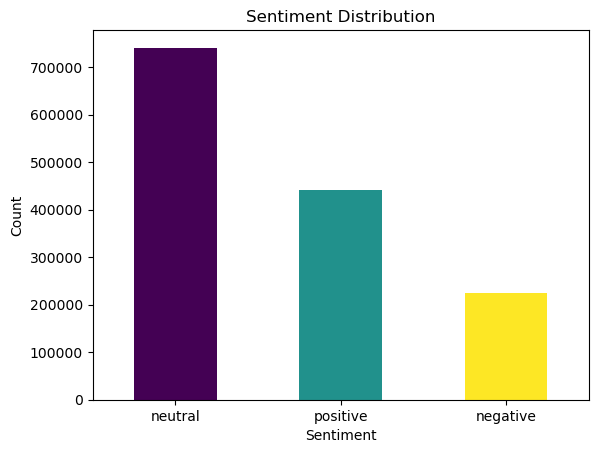

In [26]:
News_Headlines['sentiment_class'].value_counts().plot(kind='bar', color=['#440154', '#21918c', '#fde725'])
plt.title('Bar graph showing Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


### Calculate Daily Stock Returns

Compute the percentage change in daily closing prices to represent stock movements.

In [38]:
AAPL['daily_stoke_return'] = AAPL['Close'].pct_change() * 100
AMZN['daily_stoke_return'] = AMZN['Close'].pct_change() * 100
GOOG['daily_stoke_return'] = GOOG['Close'].pct_change() * 100
META['daily_stoke_return'] = META['Close'].pct_change() * 100
MSFT['daily_stoke_return'] = MSFT['Close'].pct_change() * 100
NVDA['daily_stoke_return'] = NVDA['Close'].pct_change() * 100
TSLA['daily_stoke_return'] = TSLA['Close'].pct_change() * 100

In [31]:
AAPL['daily_stoke_return']

0             NaN
1       -5.217061
2       -7.339788
3        2.475091
4        2.899246
           ...   
10993   -2.875428
10994   -0.480456
10995    0.216102
10996    0.128463
10997    0.256597
Name: daily_stoke_return, Length: 10998, dtype: float64

In [32]:
AMZN['daily_stoke_return']

0             NaN
1      -11.702769
2       -1.204047
3       -4.268472
4      -12.739234
          ...    
6841    -2.993403
6842    -0.541943
6843     1.473447
6844     0.383560
6845    -0.813313
Name: daily_stoke_return, Length: 6846, dtype: float64

In [33]:
GOOG['daily_stoke_return']

0            NaN
1       7.942989
2       1.006362
3      -4.140766
4       1.077510
          ...   
5015   -5.027239
5016   -2.987894
5017   -0.283762
5018    1.452462
5019    0.426574
Name: daily_stoke_return, Length: 5020, dtype: float64

In [34]:
META['daily_stoke_return']

0            NaN
1       2.393038
2      -5.063740
3      -0.223795
4       3.588782
          ...   
2921   -5.610922
2922   -1.703988
2923    2.710573
2924    0.002143
2925   -0.541107
Name: daily_stoke_return, Length: 2926, dtype: float64

In [35]:
MSFT['daily_stoke_return']

0            NaN
1       3.571209
2       1.725027
3      -2.543174
4      -1.739026
          ...   
9667   -3.585481
9668   -2.448123
9669    1.641968
9670    0.343316
9671   -0.892836
Name: daily_stoke_return, Length: 9672, dtype: float64

In [36]:
NVDA['daily_stoke_return']

0             NaN
1       10.476398
2       -7.759362
3       -0.311031
4       -0.314397
          ...    
6416    -6.803162
6417    -1.724290
6418     0.694691
6419    -1.300196
6420    -7.043636
Name: daily_stoke_return, Length: 6421, dtype: float64

In [39]:
TSLA['daily_stoke_return']

0             NaN
1       -0.251148
2       -7.847274
3      -12.568307
4      -16.093748
          ...    
3540   -12.334605
3541     1.972311
3542    -0.204312
3543     5.595998
3544    -4.084451
Name: daily_stoke_return, Length: 3545, dtype: float64

### Correlation Analysis

 Use statistical methods to test the correlation between daily news sentiment scores and stock returns

#### Aggregated Sentiments

In [41]:
aggregated_sentiments = News_Headlines.groupby('date')['overall_score'].mean().reset_index()

In [ ]:
MergeDailySentimentWithAAPL = pd.merge(aggregated_sentiments, AAPL[['date', 'daily_stoke_return']], on='date')
MergeDailySentimentWithAMZN = pd.merge(aggregated_sentiments, AMZN[['date', 'daily_stoke_return']], on='date')
MergeDailySentimentWithGOOG = pd.merge(aggregated_sentiments, GOOG[['date', 'daily_stoke_return']], on='date')
MergeDailySentimentWithMETA = pd.merge(aggregated_sentiments, META[['date', 'daily_stoke_return']], on='date')
MergeDailySentimentWithMSFT = pd.merge(aggregated_sentiments, MSFT[['date', 'daily_stoke_return']], on='date')
MergeDailySentimentWithNVDA = pd.merge(aggregated_sentiments, NVDA[['date', 'daily_stoke_return']], on='date')
MergeDailySentimentWithTSLA = pd.merge(aggregated_sentiments, TSLA[['date', 'daily_stoke_return']], on='date')

### Calculate Correlation

Determine the Pearson correlation coefficient between average daily sentiment scores and stock daily returns.

In [46]:
AAPL_Correlation = MergeDailySentimentWithAAPL['overall_score'].corr(MergeDailySentimentWithAAPL['daily_stoke_return'])
print(f"Pearson correlation coefficient: {AAPL_Correlation}")

Pearson correlation coefficient: 0.14605816008631775


In [47]:
AMZN_Correlation = MergeDailySentimentWithAMZN['overall_score'].corr(MergeDailySentimentWithAMZN['daily_stoke_return'])
print(f"Pearson correlation coefficient: {AMZN_Correlation}")

Pearson correlation coefficient: 0.08223958354879743


In [48]:
GOOG_Correlation = MergeDailySentimentWithGOOG['overall_score'].corr(MergeDailySentimentWithGOOG['daily_stoke_return'])
print(f"Pearson correlation coefficient: {GOOG_Correlation}")

Pearson correlation coefficient: 0.12544420764526074


In [49]:
META_Correlation = MergeDailySentimentWithMETA['overall_score'].corr(MergeDailySentimentWithMETA['daily_stoke_return'])
print(f"Pearson correlation coefficient: {META_Correlation}")

Pearson correlation coefficient: 0.16399365746755015


In [50]:
MSFT_Correlation = MergeDailySentimentWithMSFT['overall_score'].corr(MergeDailySentimentWithMSFT['daily_stoke_return'])
print(f"Pearson correlation coefficient: {MSFT_Correlation}")

Pearson correlation coefficient: 0.12222555062309494


In [51]:
NVDA_Correlation = MergeDailySentimentWithNVDA['overall_score'].corr(MergeDailySentimentWithNVDA['daily_stoke_return'])
print(f"Pearson correlation coefficient: {NVDA_Correlation}")

Pearson correlation coefficient: 0.1145975858743781


In [52]:
TSLA_Correlation = MergeDailySentimentWithTSLA['overall_score'].corr(MergeDailySentimentWithTSLA['daily_stoke_return'])
print(f"Pearson correlation coefficient: {TSLA_Correlation}")

Pearson correlation coefficient: 0.11832465586230914


Scatter plot for each sentiment and Daily return

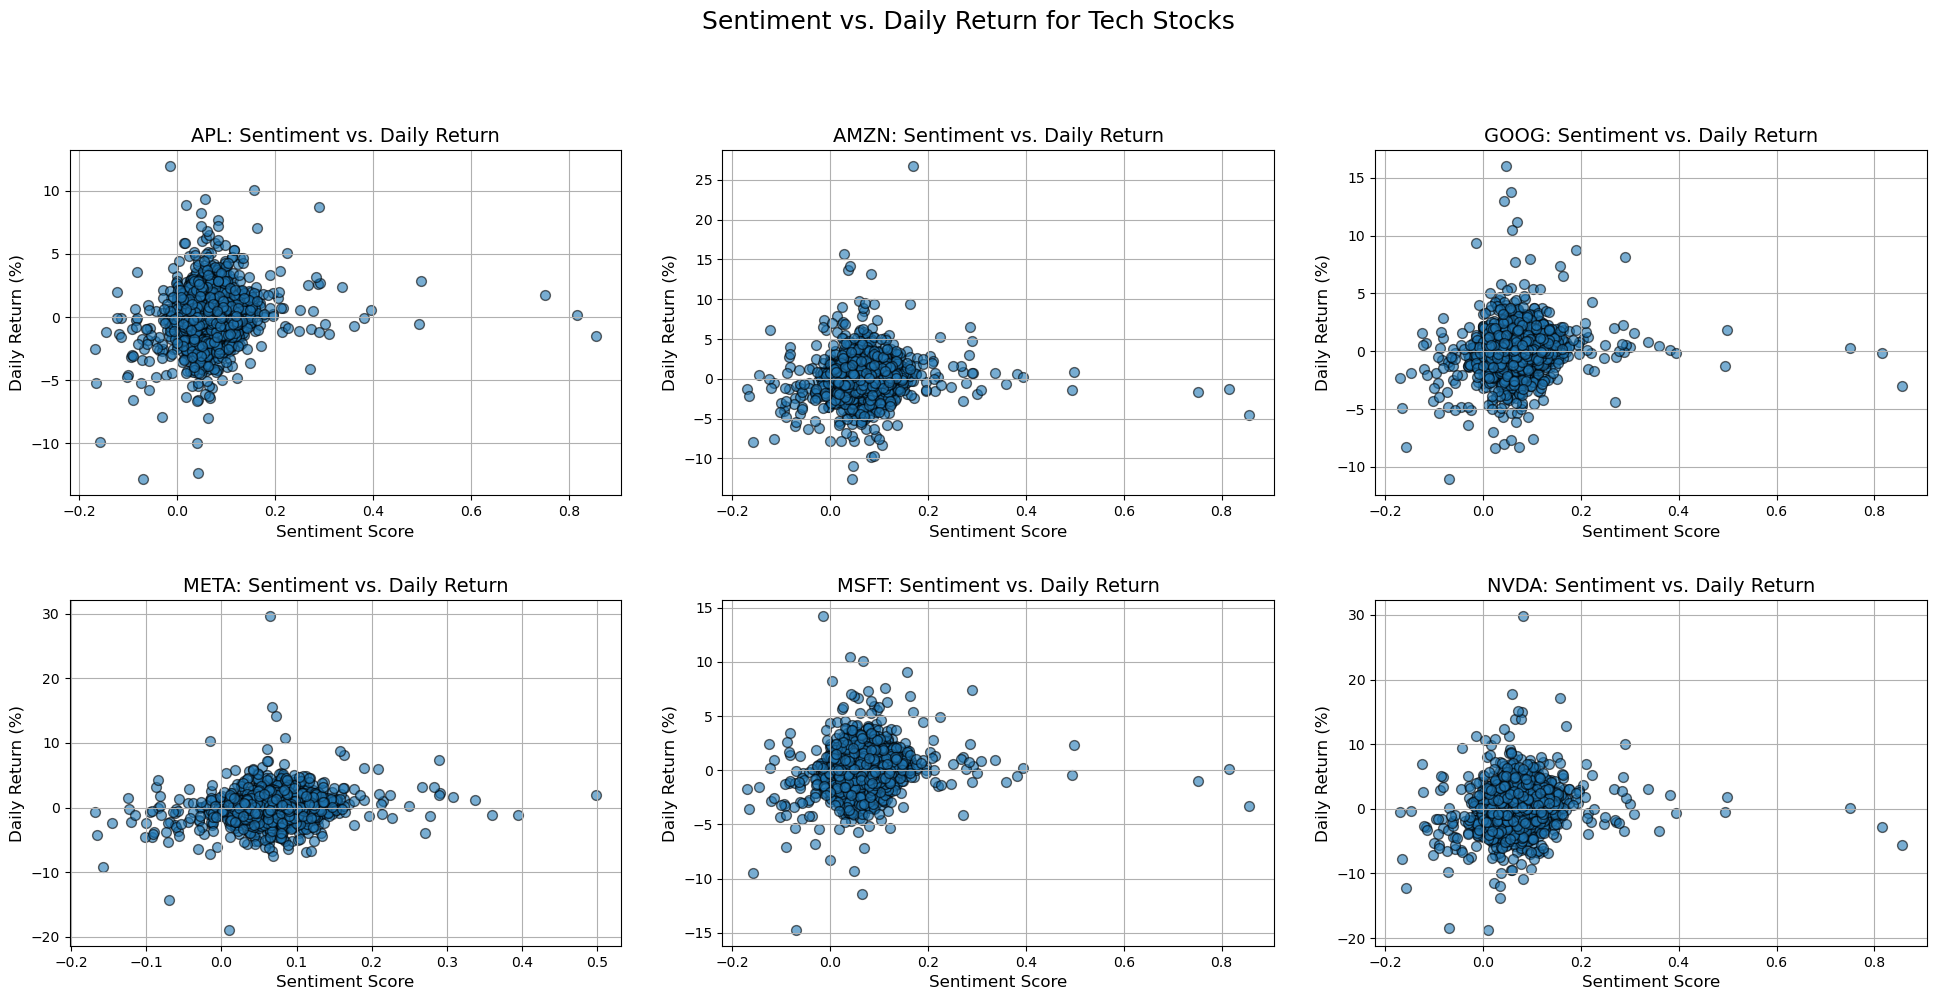

In [68]:
import matplotlib.pyplot as plt

merged_datasets = [
    ('APL', MergeDailySentimentWithAAPL),
    ('AMZN', MergeDailySentimentWithAMZN),
    ('GOOG', MergeDailySentimentWithGOOG),
    ('META', MergeDailySentimentWithMETA),
    ('MSFT', MergeDailySentimentWithMSFT),
    ('NVDA', MergeDailySentimentWithNVDA),
]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 14))
axes = axes.flatten()

# Loop through each dataset and plot
for i, (ticker, data) in enumerate(merged_datasets):
    axes[i].scatter(
        data['overall_score'], 
        data['daily_stoke_return'], 
        alpha=0.6, 
        color='tab:blue', 
        edgecolors='k',
        s=50
    )
    axes[i].set_title(f'{ticker}: Sentiment vs. Daily Return', fontsize=14)
    axes[i].set_xlabel('Sentiment Score', fontsize=12)
    axes[i].set_ylabel('Daily Return (%)', fontsize=12)
    axes[i].grid(True)

# Remove any extra axes if less than 9 stocks
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(pad=3.0)
plt.suptitle('Sentiment vs. Daily Return for Tech Stocks', fontsize=18, y=1.02)
plt.subplots_adjust(top=0.92)  # make space for the super title

plt.show()


## Time series plot of sentiment and Daily returns

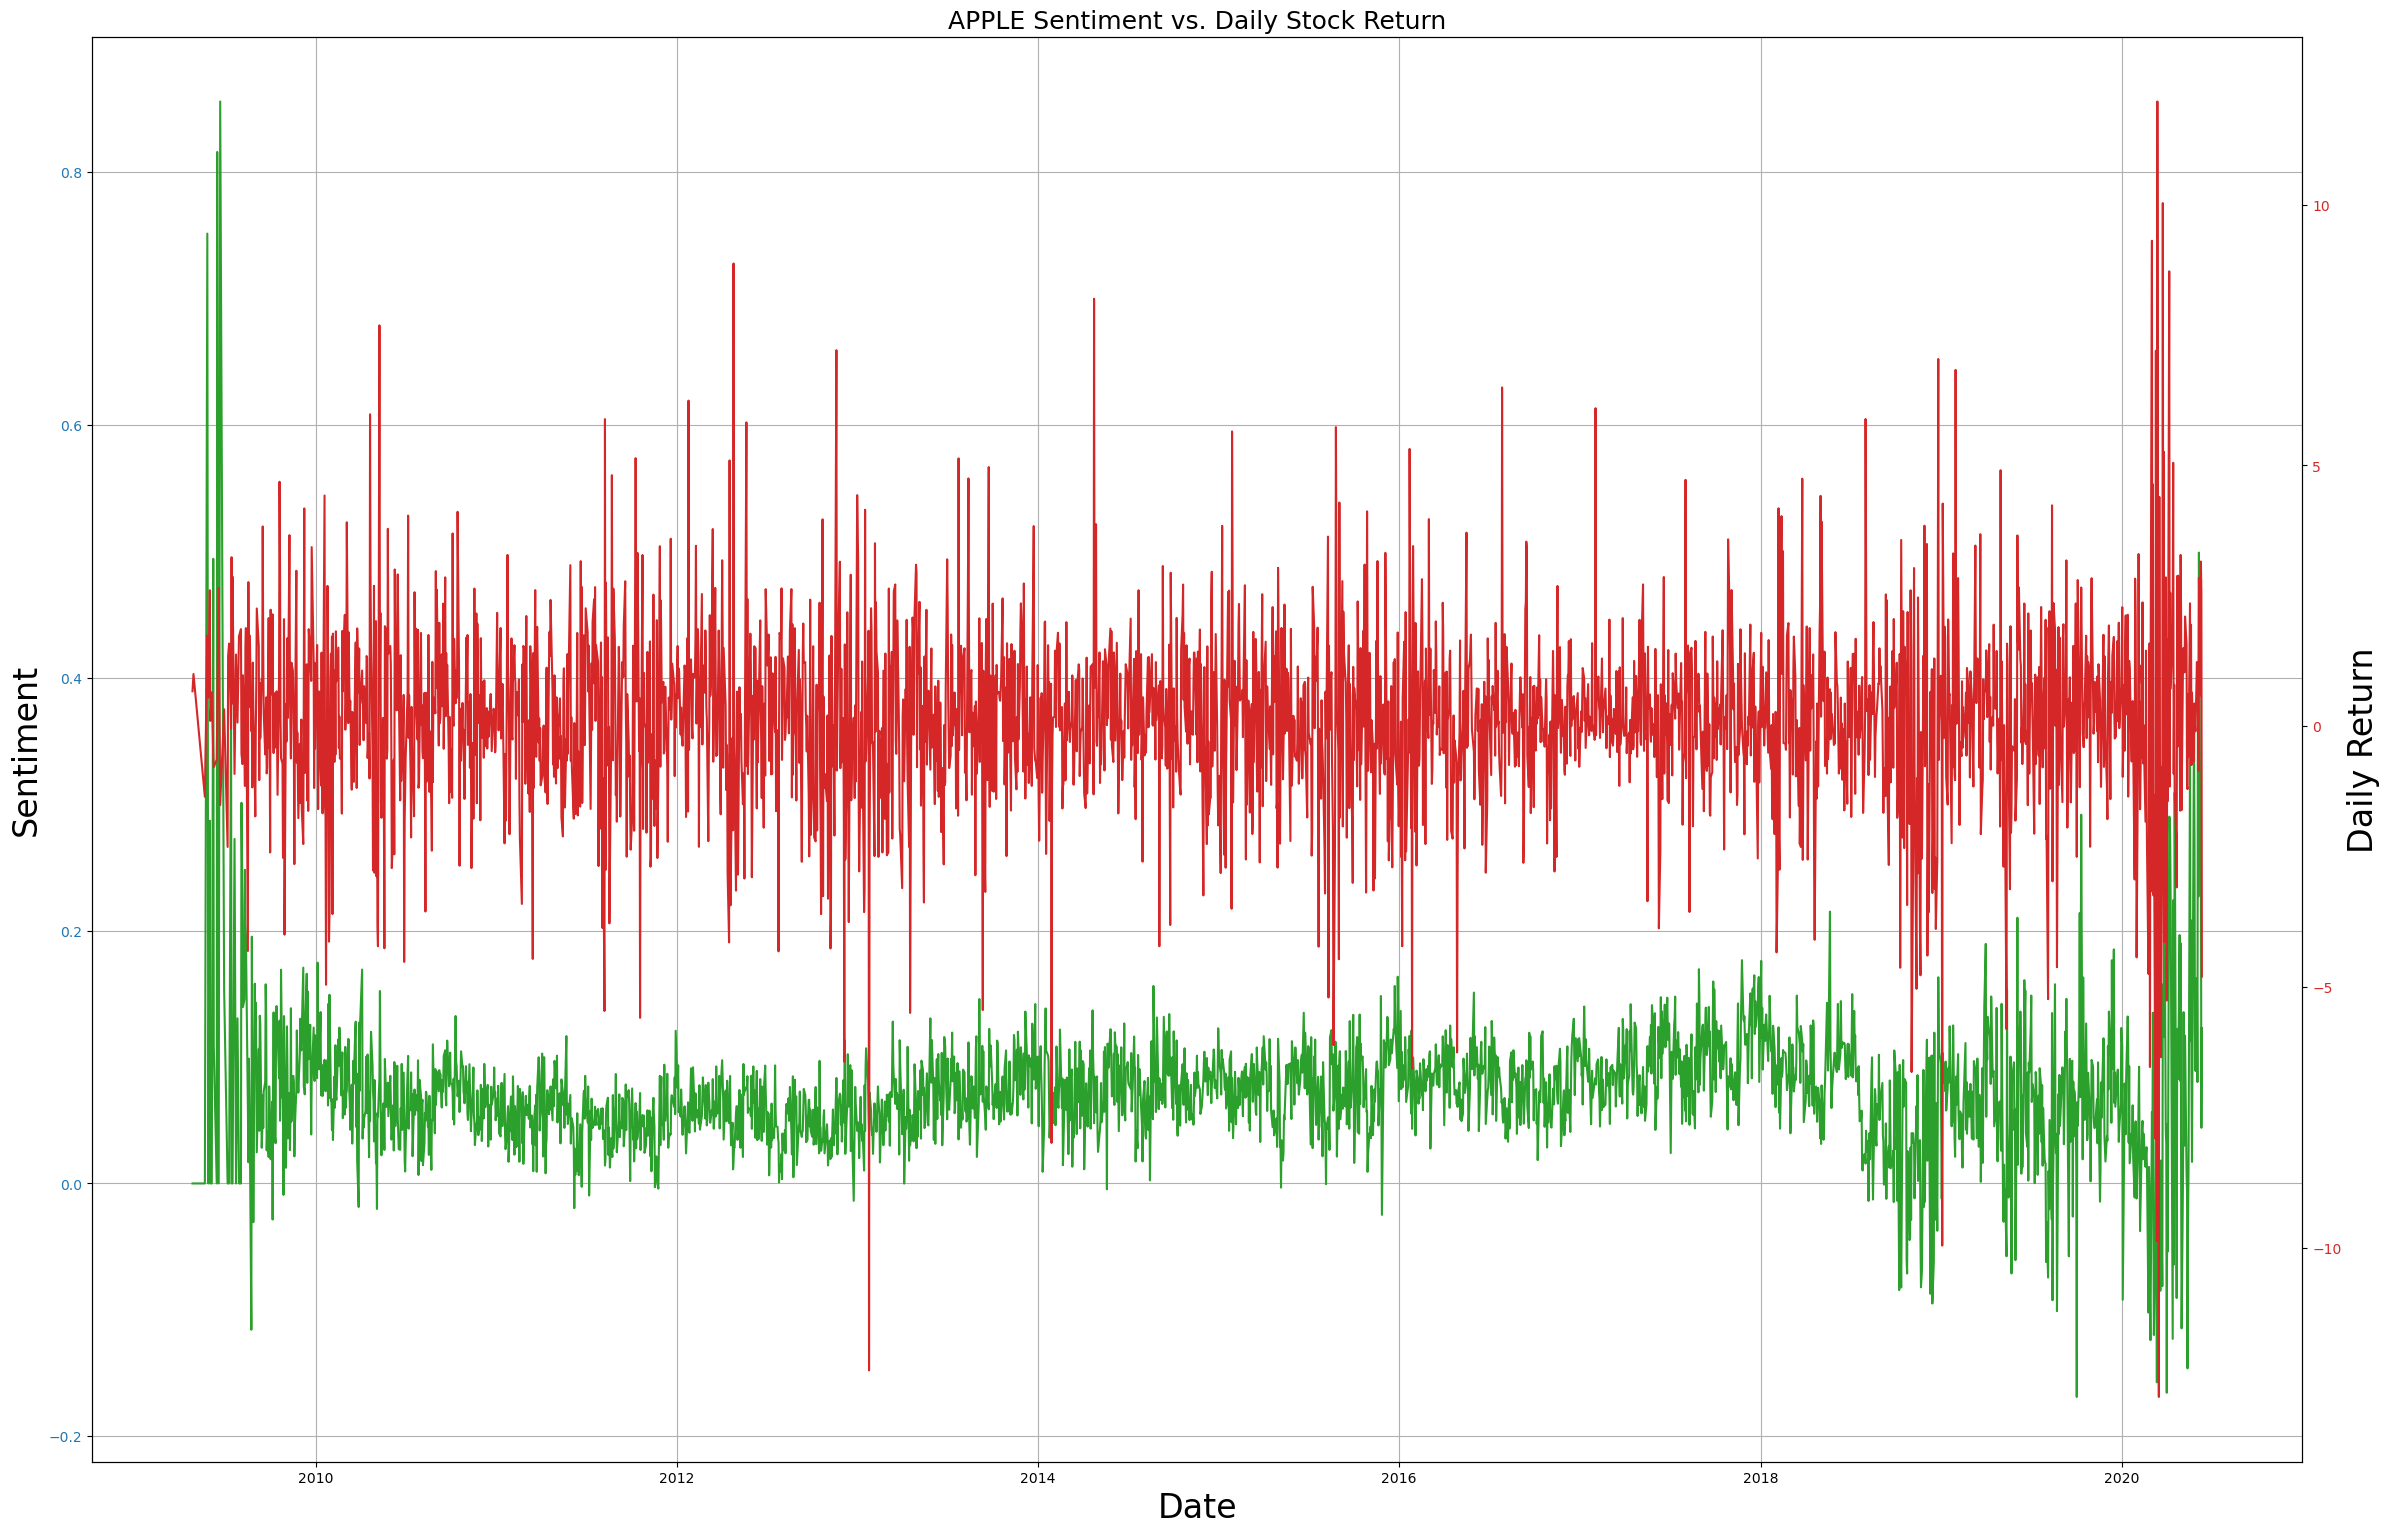

In [59]:
fig, ax1 = plt.subplots(figsize=(24, 18))

ax1.set_xlabel('Date', fontsize=24, color='black')
ax1.set_ylabel('Sentiment', fontsize=24, color='black')
ax1.plot(MergeDailySentimentWithAAPL['date'], MergeDailySentimentWithAAPL['overall_score'], color='tab:green', label='Sentiment')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('Daily Return', fontsize=24, color='black')
ax2.plot(MergeDailySentimentWithAAPL['date'], MergeDailySentimentWithAAPL['daily_stoke_return'], color='tab:red', label='Daily Return')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.xticks(rotation=45)
fig.tight_layout()
plt.subplots_adjust(bottom=0.2) 

plt.title('APPLE Sentiment vs. Daily Stock Return', fontsize=18)
plt.show()


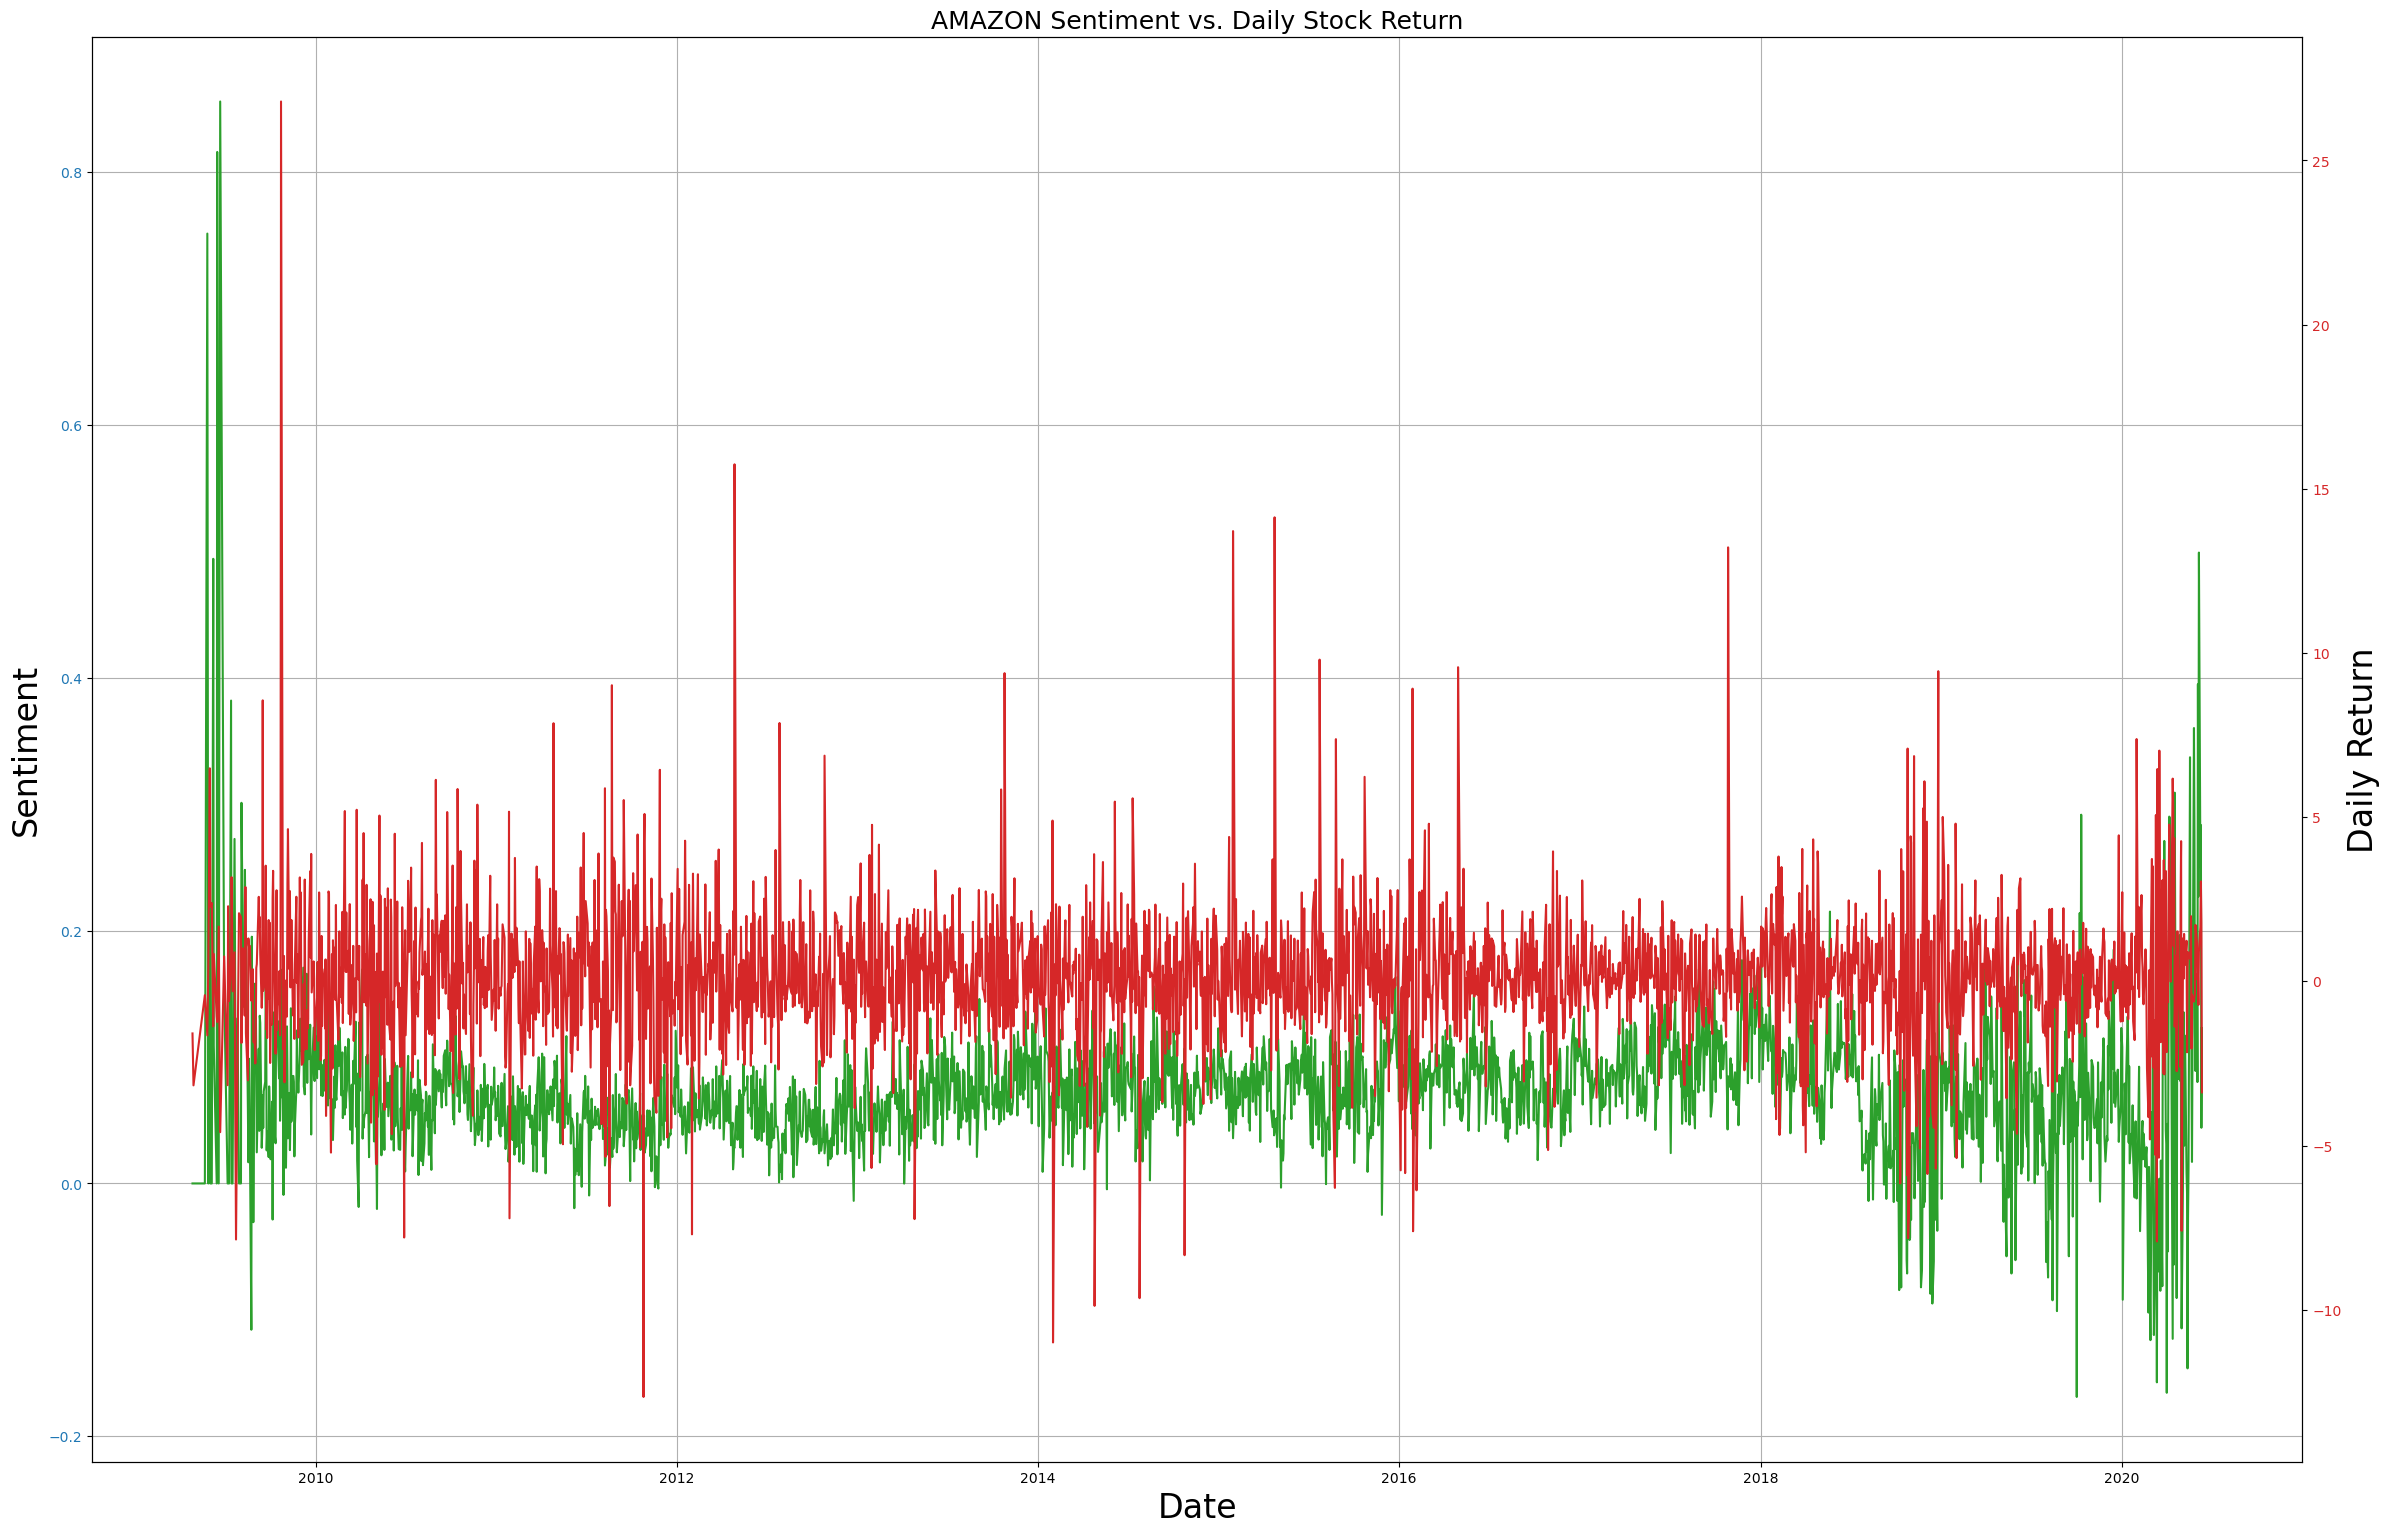

In [60]:
fig, ax1 = plt.subplots(figsize=(24, 18))

ax1.set_xlabel('Date', fontsize=24, color='black')
ax1.set_ylabel('Sentiment', fontsize=24, color='black')
ax1.plot(MergeDailySentimentWithAMZN['date'], MergeDailySentimentWithAMZN['overall_score'], color='tab:green', label='Sentiment')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('Daily Return', fontsize=24, color='black')
ax2.plot(MergeDailySentimentWithAMZN['date'], MergeDailySentimentWithAMZN['daily_stoke_return'], color='tab:red', label='Daily Return')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.xticks(rotation=45)
fig.tight_layout()
plt.subplots_adjust(bottom=0.2) 

plt.title('AMAZON Sentiment vs. Daily Stock Return', fontsize=18)
plt.show()


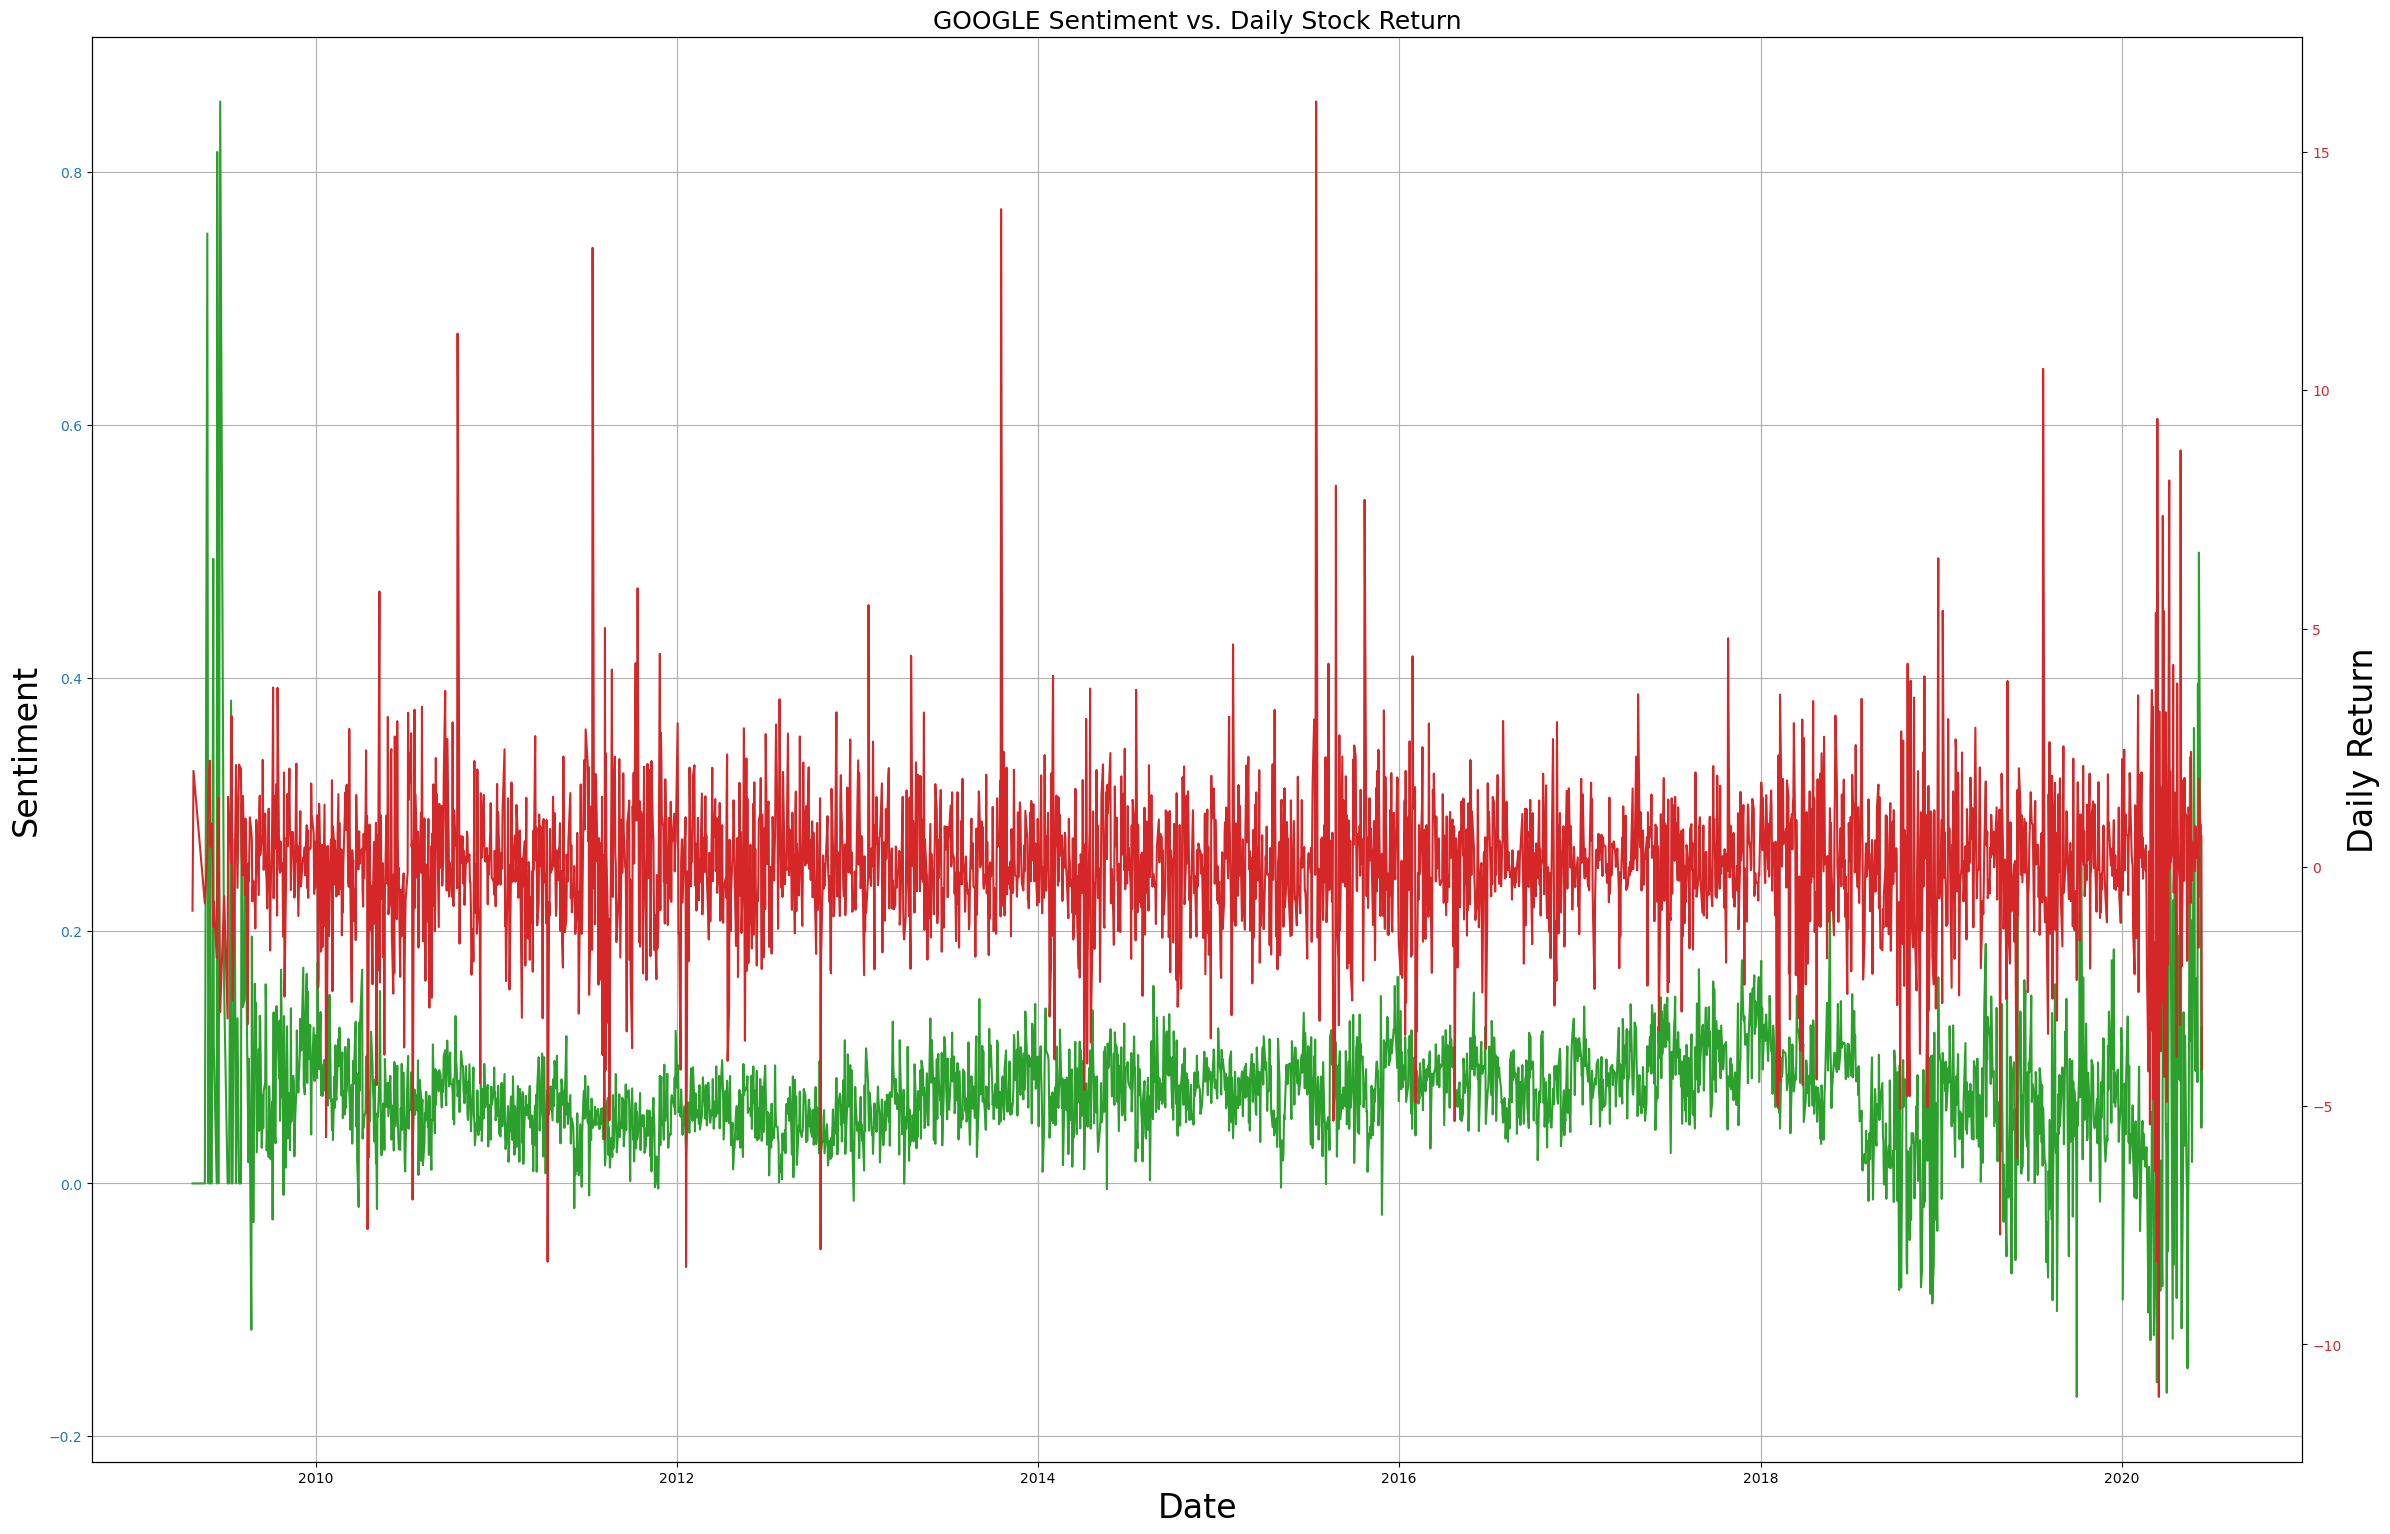

In [58]:
fig, ax1 = plt.subplots(figsize=(24, 18))

ax1.set_xlabel('Date', fontsize=24, color='black')
ax1.set_ylabel('Sentiment', fontsize=24, color='black')
ax1.plot(MergeDailySentimentWithGOOG['date'], MergeDailySentimentWithGOOG['overall_score'], color='tab:green', label='Sentiment')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('Daily Return', fontsize=24, color='black')
ax2.plot(MergeDailySentimentWithGOOG['date'], MergeDailySentimentWithGOOG['daily_stoke_return'], color='tab:red', label='Daily Return')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.xticks(rotation=45)
fig.tight_layout()
plt.subplots_adjust(bottom=0.2)  # add space for x-label

plt.title('GOOGLE Sentiment vs. Daily Stock Return', fontsize=18)
plt.show()


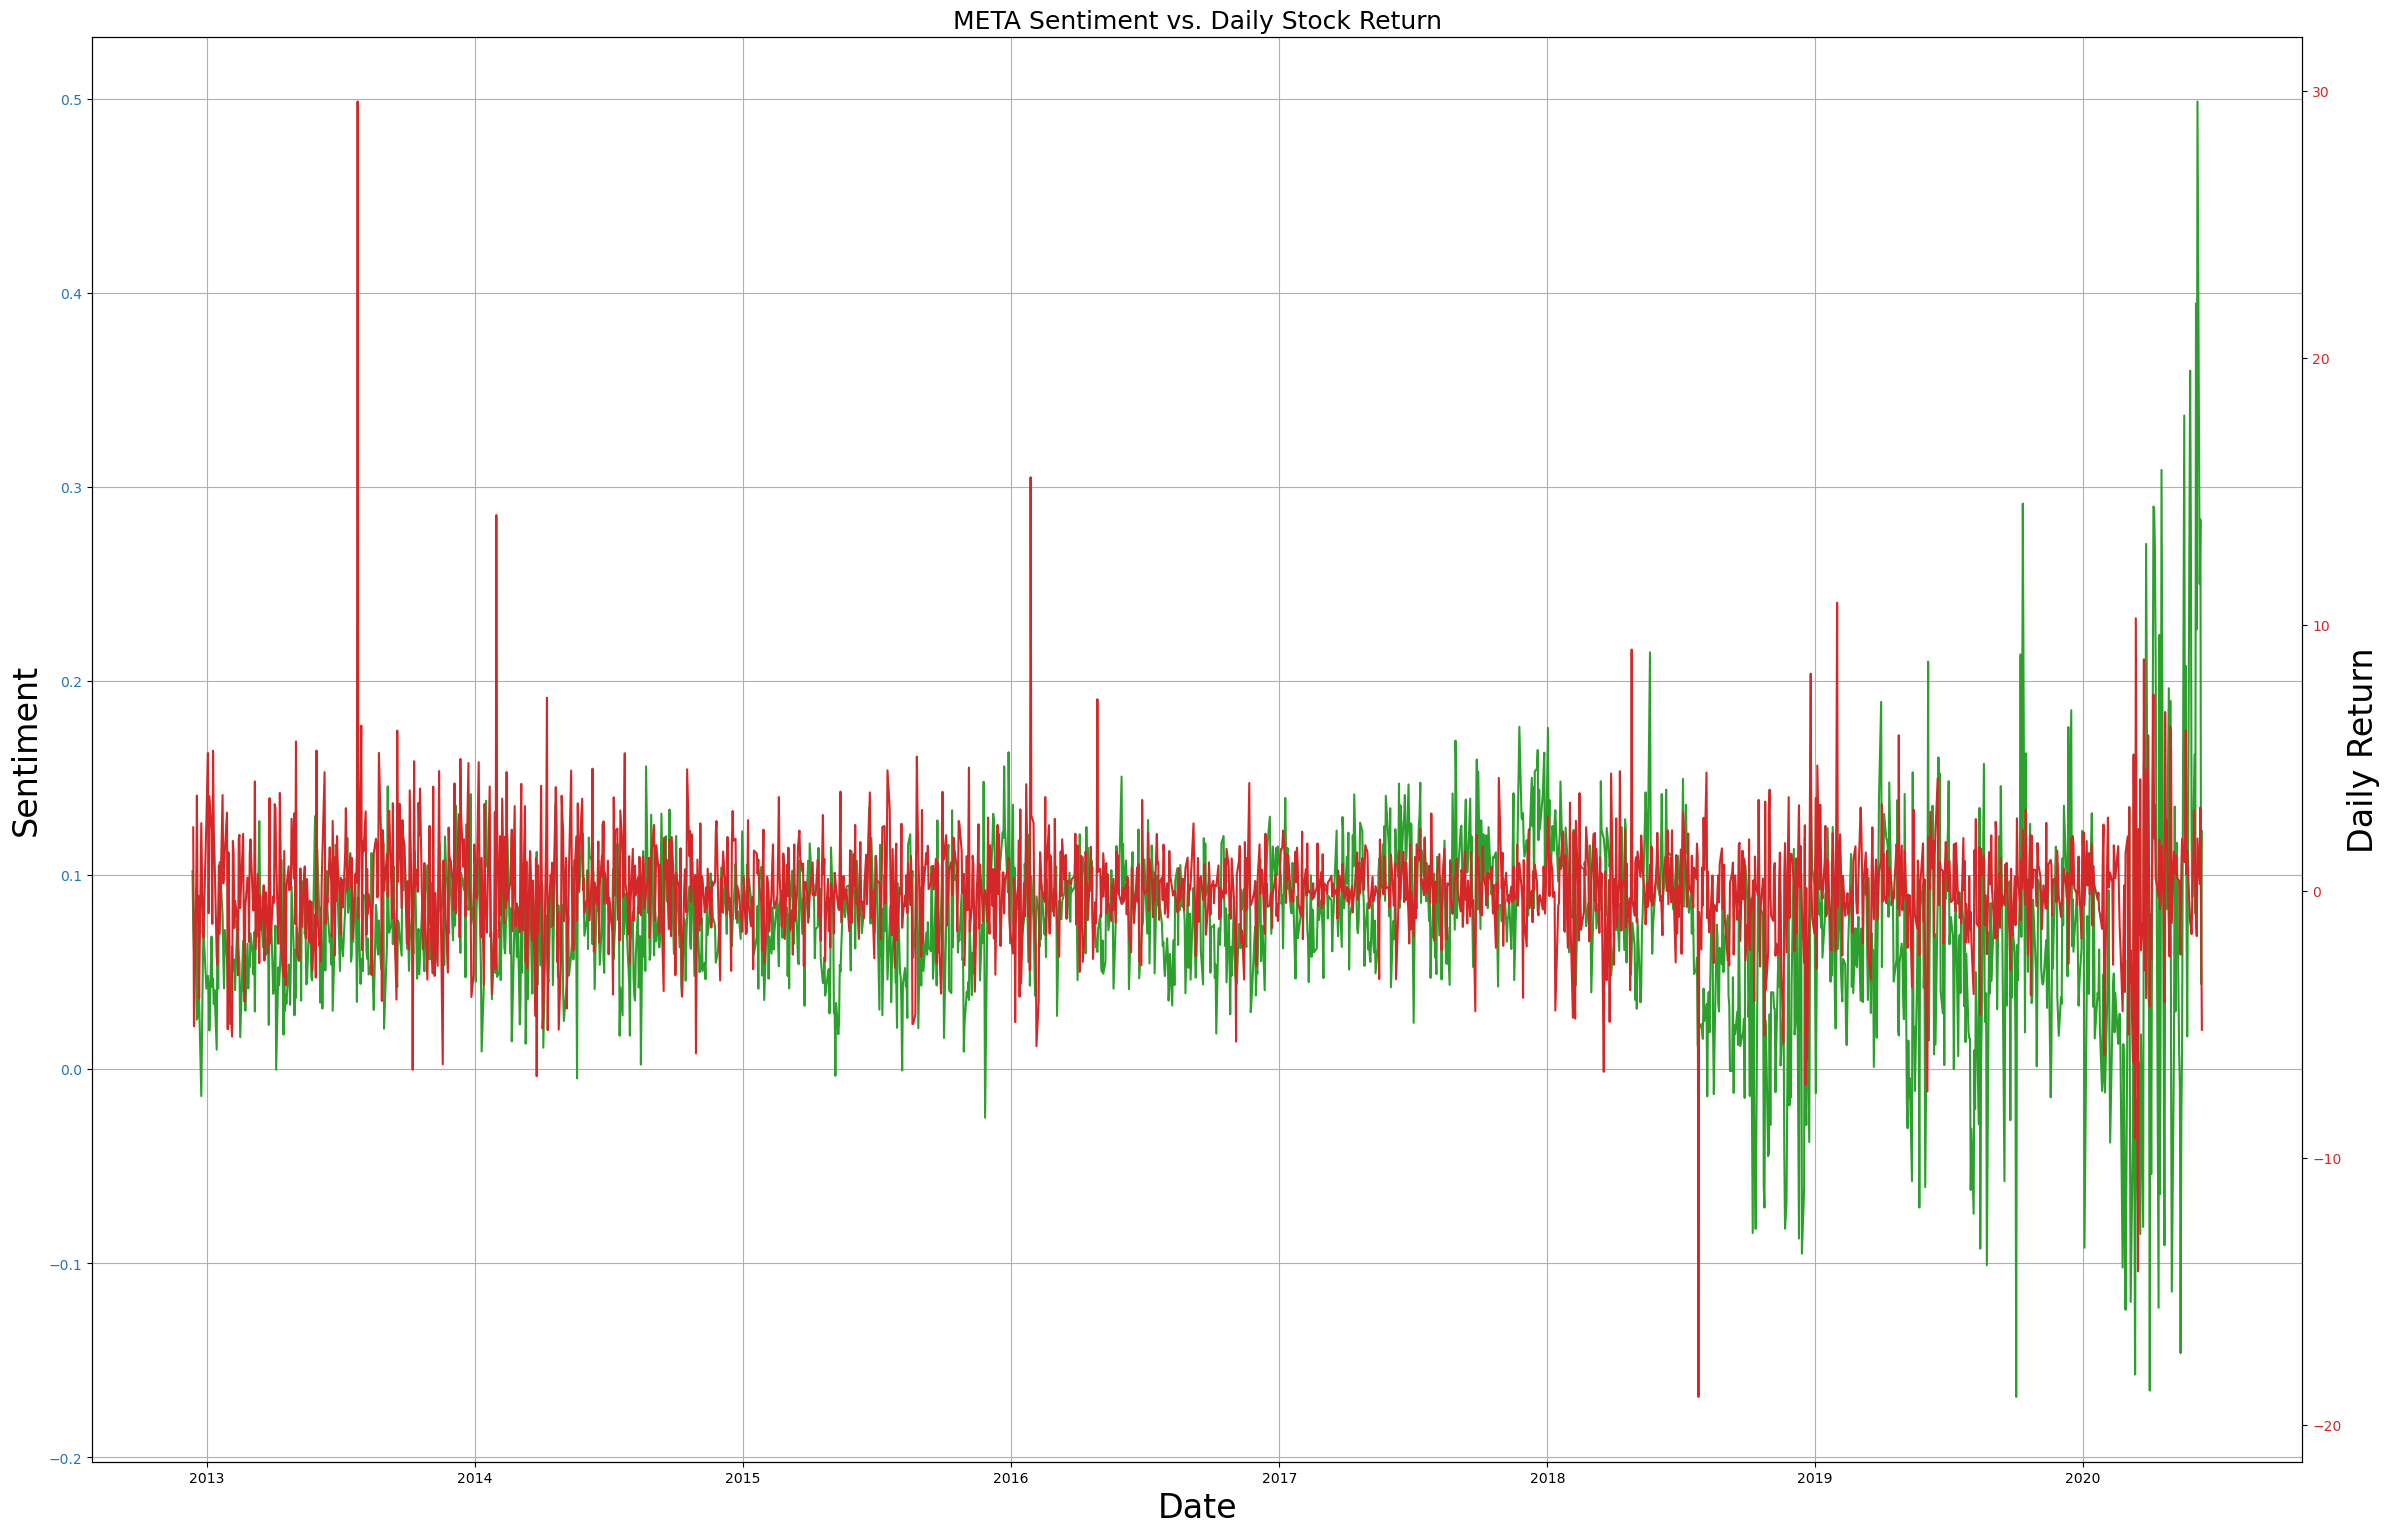

In [61]:
fig, ax1 = plt.subplots(figsize=(24, 18))

ax1.set_xlabel('Date', fontsize=24, color='black')
ax1.set_ylabel('Sentiment', fontsize=24, color='black')
ax1.plot(MergeDailySentimentWithMETA['date'], MergeDailySentimentWithMETA['overall_score'], color='tab:green', label='Sentiment')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('Daily Return', fontsize=24, color='black')
ax2.plot(MergeDailySentimentWithMETA['date'], MergeDailySentimentWithMETA['daily_stoke_return'], color='tab:red', label='Daily Return')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.xticks(rotation=45)
fig.tight_layout()
plt.subplots_adjust(bottom=0.2) 

plt.title('META Sentiment vs. Daily Stock Return', fontsize=18)
plt.show()


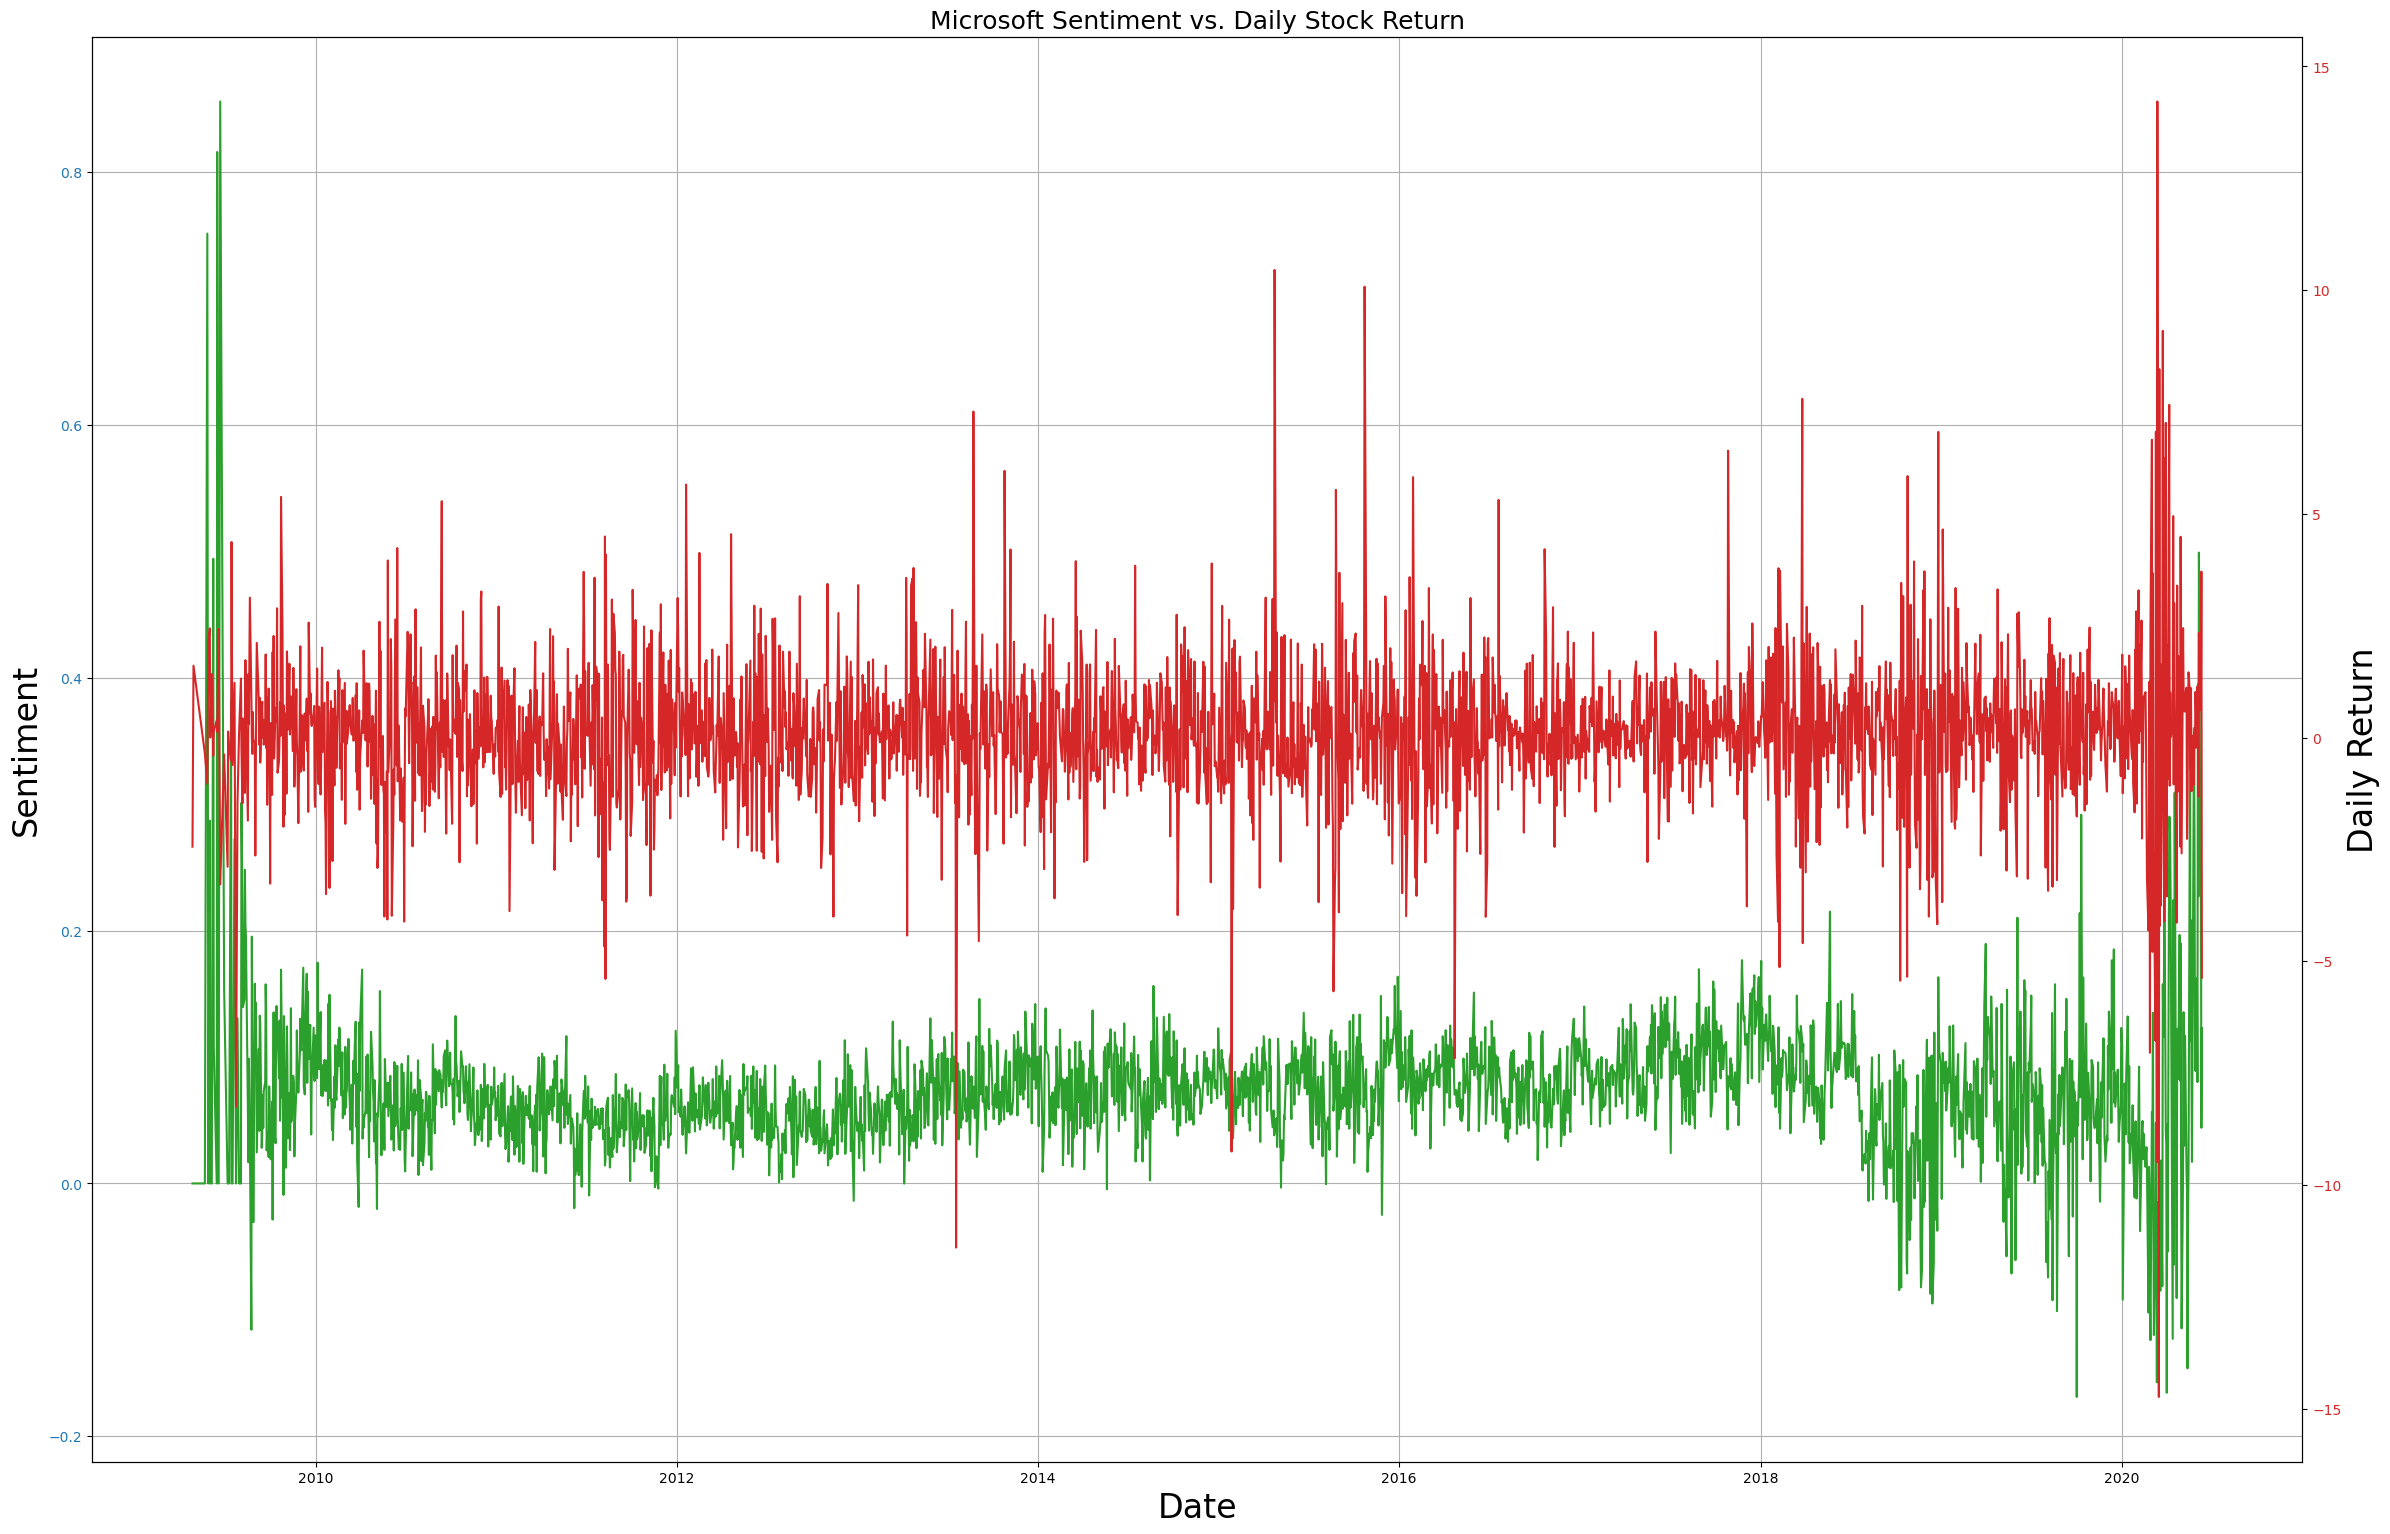

In [62]:
fig, ax1 = plt.subplots(figsize=(24, 18))

ax1.set_xlabel('Date', fontsize=24, color='black')
ax1.set_ylabel('Sentiment', fontsize=24, color='black')
ax1.plot(MergeDailySentimentWithMSFT['date'], MergeDailySentimentWithMSFT['overall_score'], color='tab:green', label='Sentiment')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('Daily Return', fontsize=24, color='black')
ax2.plot(MergeDailySentimentWithMSFT['date'], MergeDailySentimentWithMSFT['daily_stoke_return'], color='tab:red', label='Daily Return')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.xticks(rotation=45)
fig.tight_layout()
plt.subplots_adjust(bottom=0.2) 

plt.title('Microsoft Sentiment vs. Daily Stock Return', fontsize=18)
plt.show()


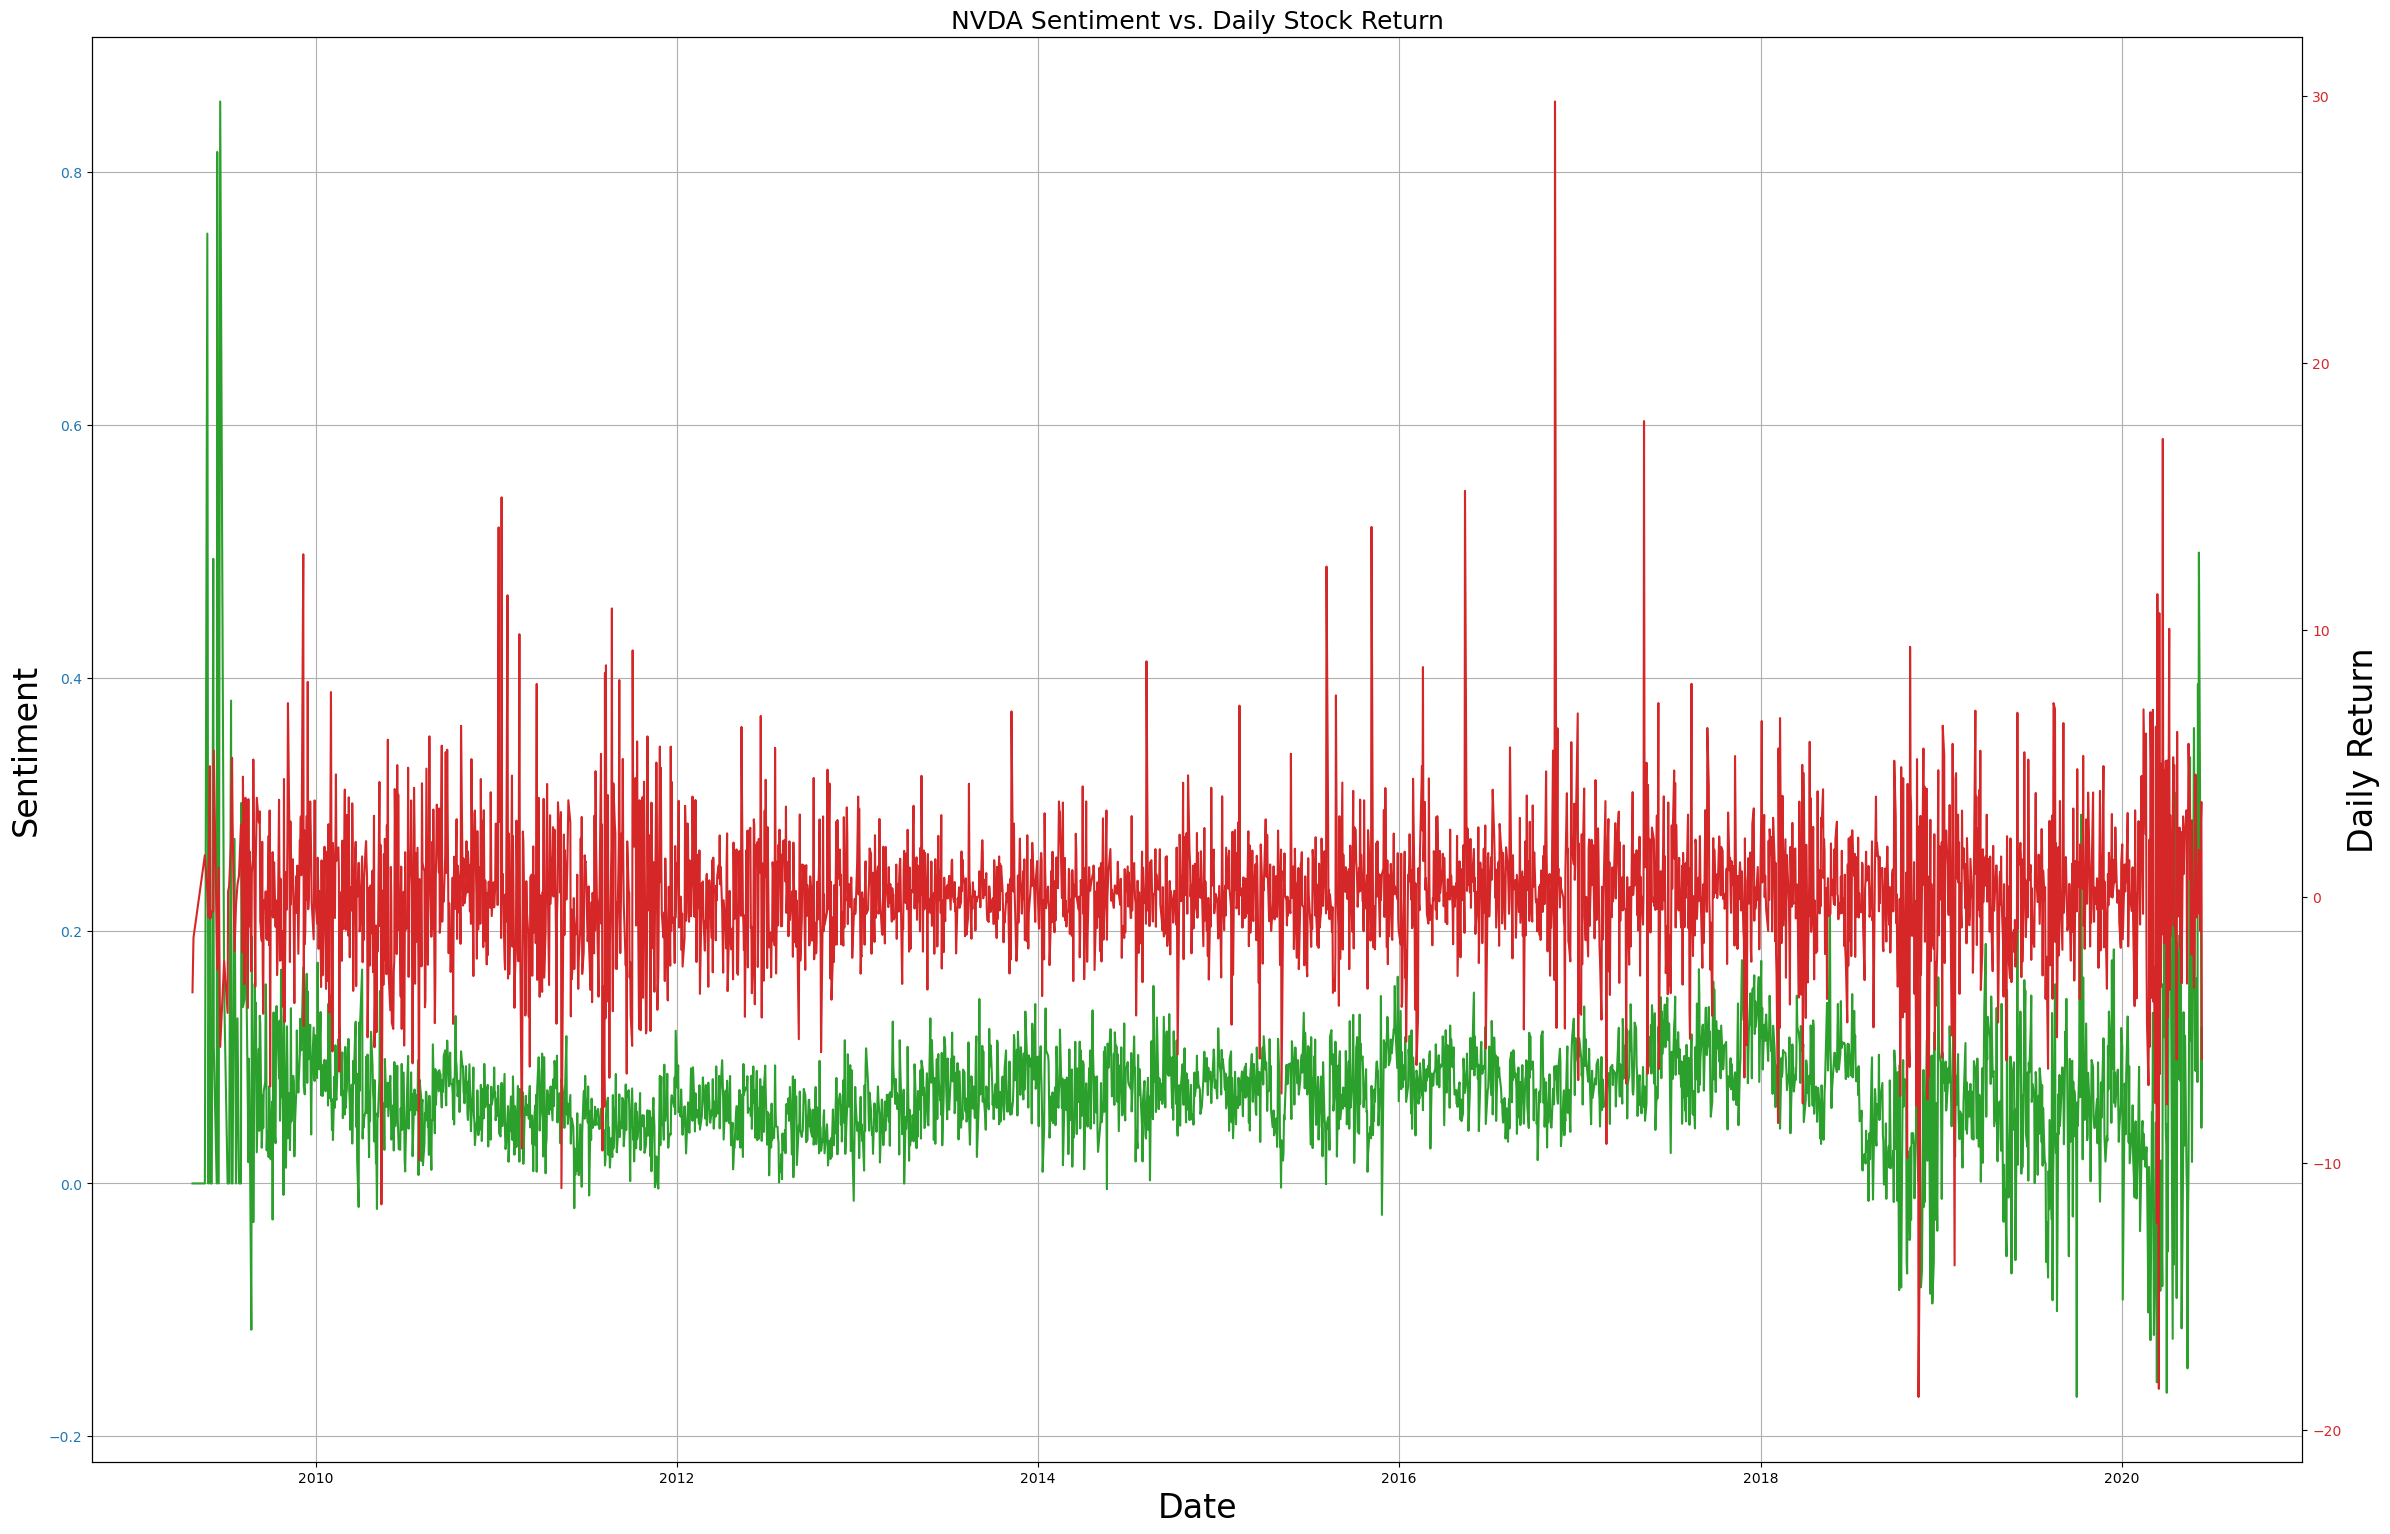

In [63]:
fig, ax1 = plt.subplots(figsize=(24, 18))

ax1.set_xlabel('Date', fontsize=24, color='black')
ax1.set_ylabel('Sentiment', fontsize=24, color='black')
ax1.plot(MergeDailySentimentWithNVDA['date'], MergeDailySentimentWithNVDA['overall_score'], color='tab:green', label='Sentiment')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('Daily Return', fontsize=24, color='black')
ax2.plot(MergeDailySentimentWithNVDA['date'], MergeDailySentimentWithNVDA['daily_stoke_return'], color='tab:red', label='Daily Return')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.xticks(rotation=45)
fig.tight_layout()
plt.subplots_adjust(bottom=0.2) 

plt.title('NVDA Sentiment vs. Daily Stock Return', fontsize=18)
plt.show()


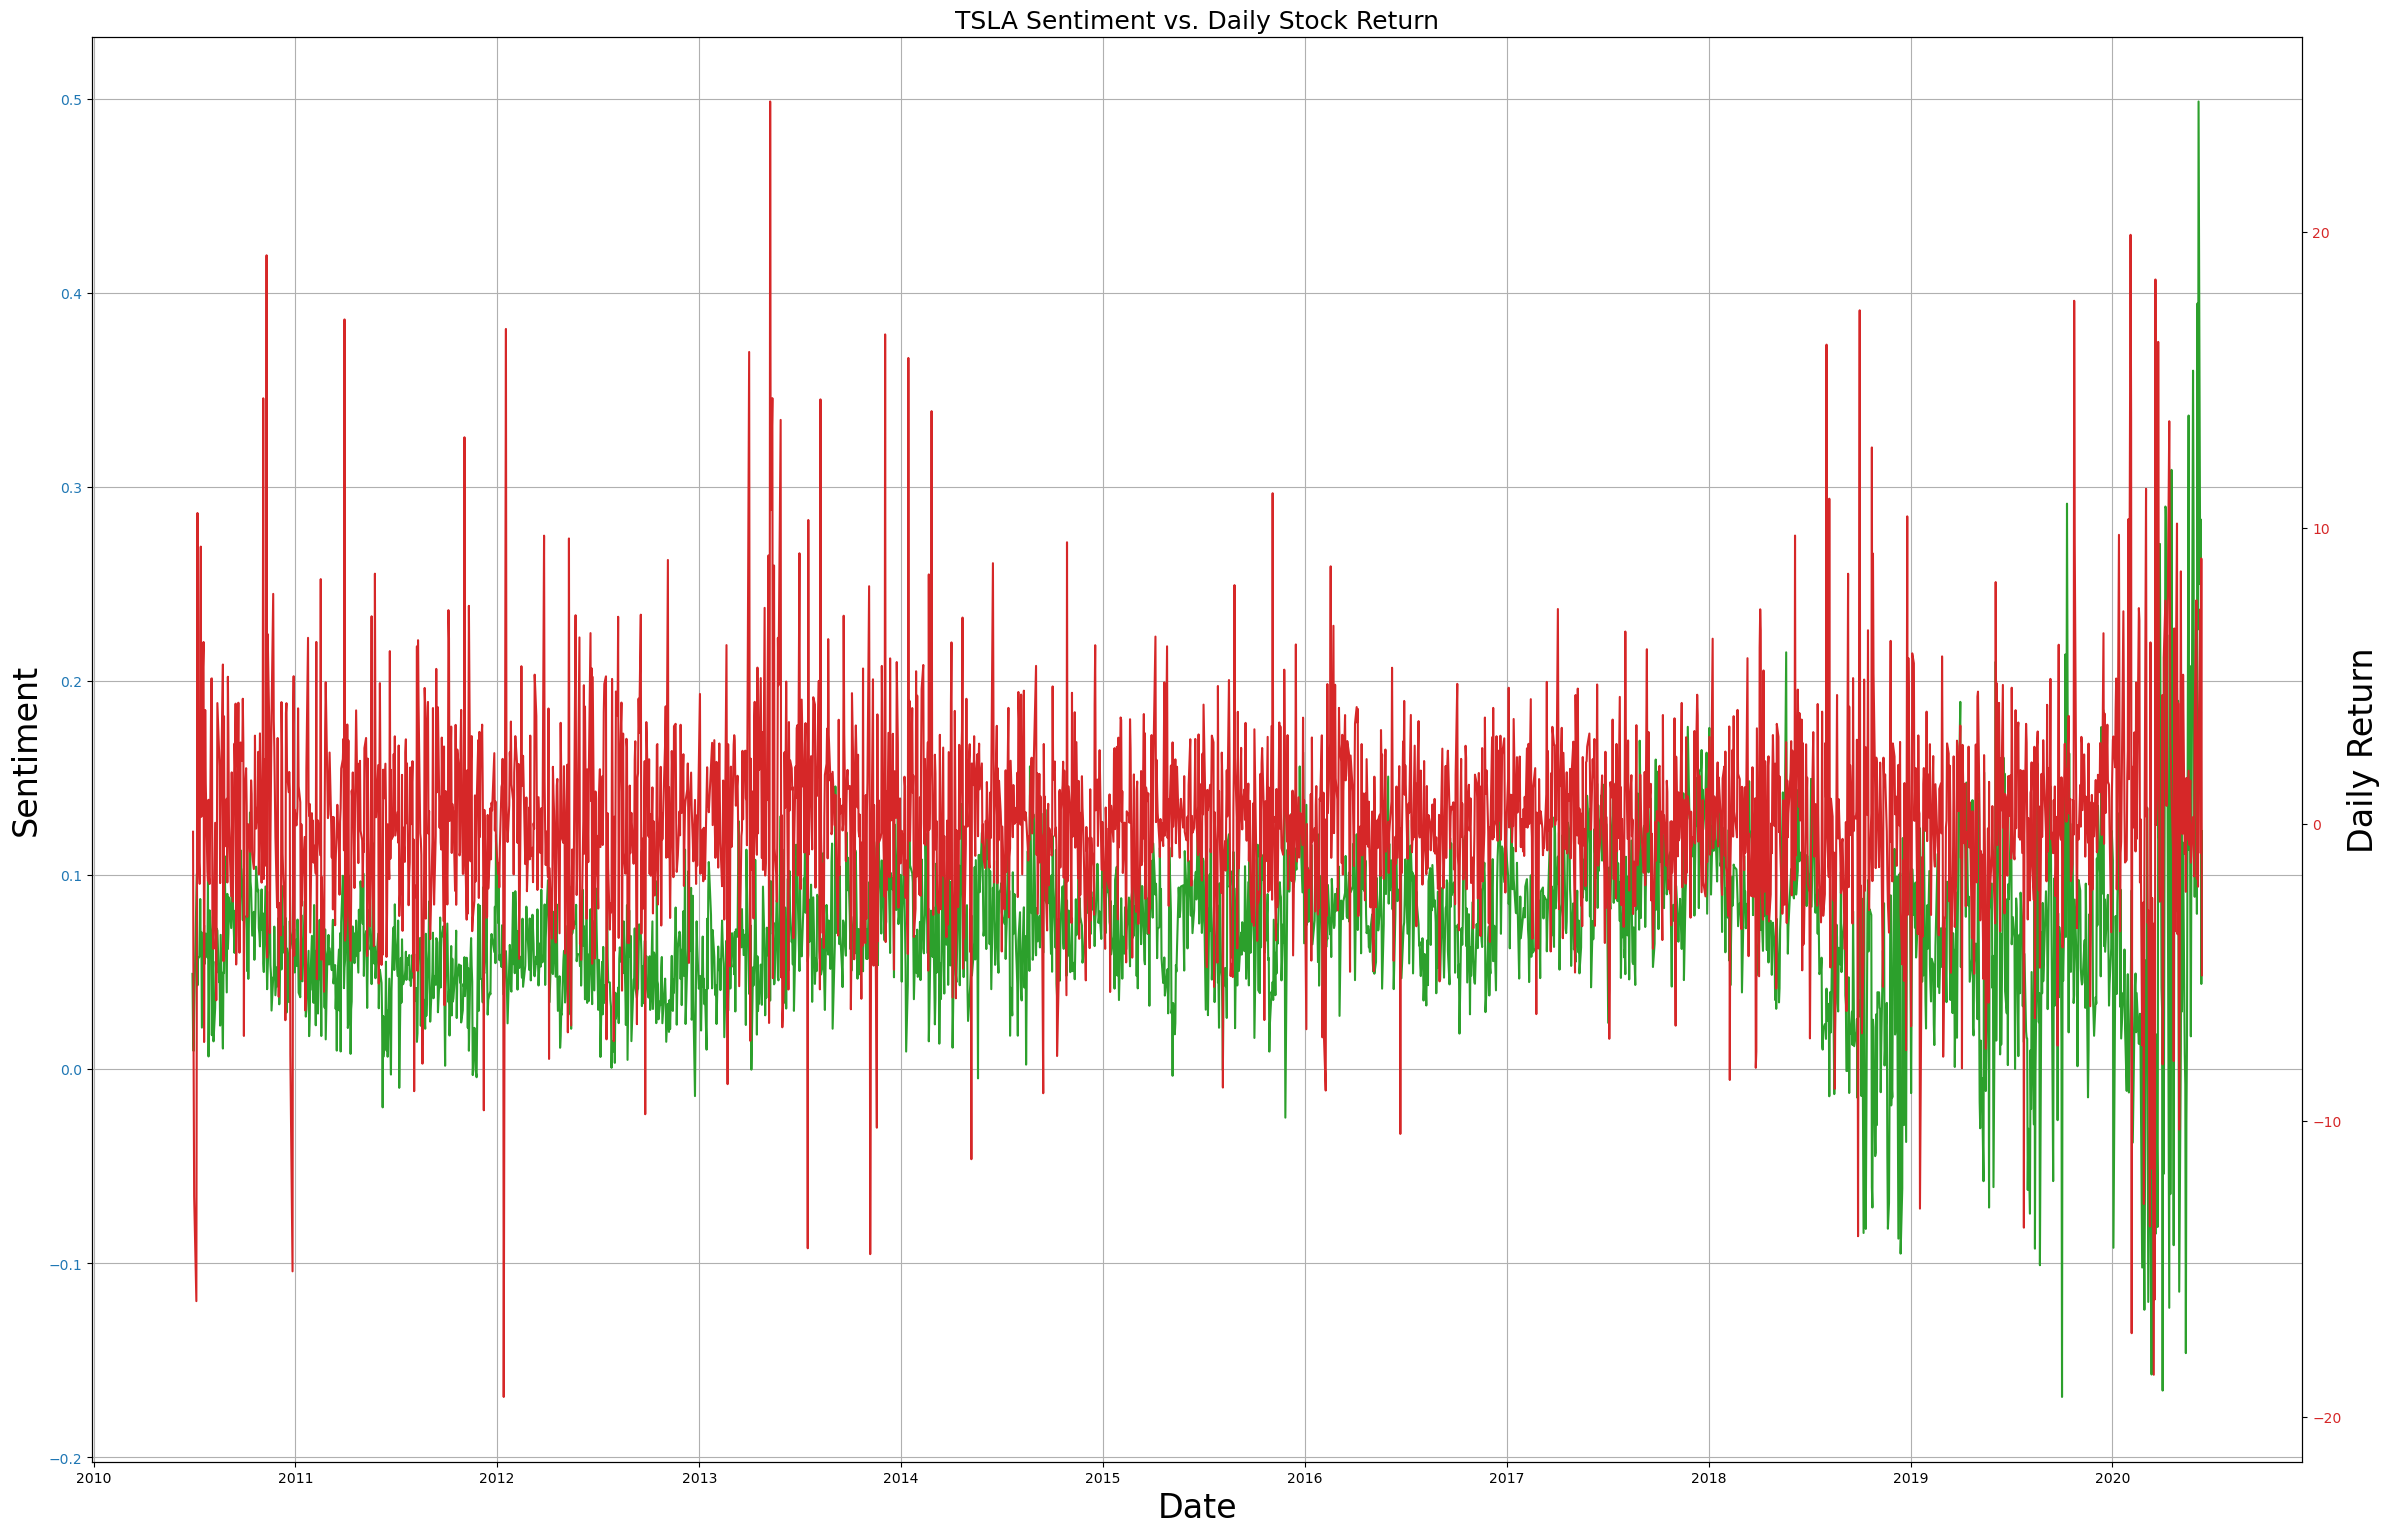

In [64]:
fig, ax1 = plt.subplots(figsize=(24, 18))

ax1.set_xlabel('Date', fontsize=24, color='black')
ax1.set_ylabel('Sentiment', fontsize=24, color='black')
ax1.plot(MergeDailySentimentWithTSLA['date'], MergeDailySentimentWithTSLA['overall_score'], color='tab:green', label='Sentiment')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('Daily Return', fontsize=24, color='black')
ax2.plot(MergeDailySentimentWithTSLA['date'], MergeDailySentimentWithTSLA['daily_stoke_return'], color='tab:red', label='Daily Return')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.xticks(rotation=45)
fig.tight_layout()
plt.subplots_adjust(bottom=0.2) 

plt.title('TSLA Sentiment vs. Daily Stock Return', fontsize=18)
plt.show()


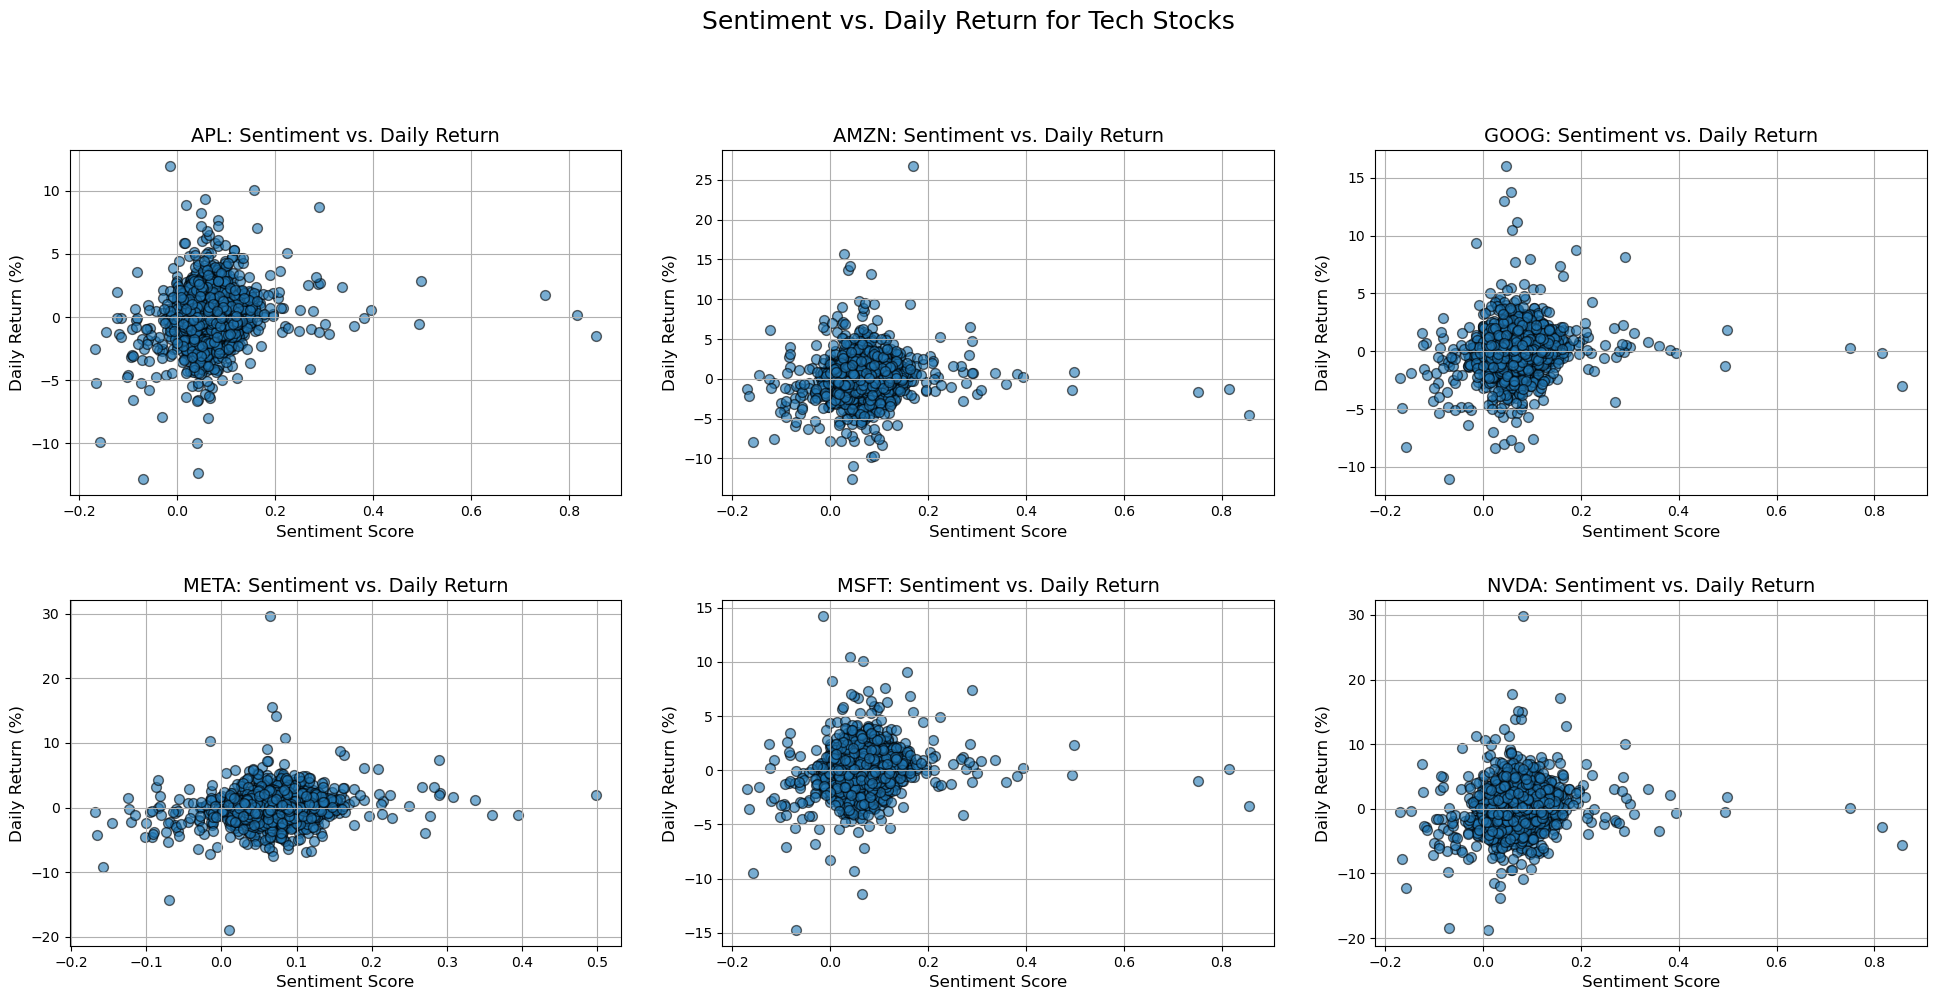

### HEATMAP for the correlation 

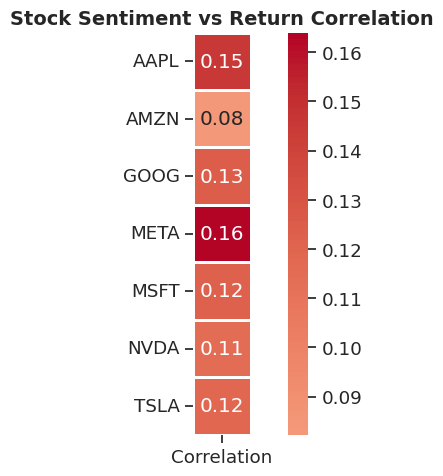

In [ ]:
correlations = {
    'AAPL': AAPL_Correlation,
    'AMZN': AMZN_Correlation,
    'GOOG': GOOG_Correlation,
    'META': META_Correlation,
    'MSFT': MSFT_Correlation,
    'NVDA': NVDA_Correlation,
    'TSLA': TSLA_Correlation
}


correlation = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])


plt.figure(figsize=(8, 5))
sns.set_theme(style="ticks", font_scale=1.2)

ax = sns.heatmap(
    correlation,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',          
    center=0,                 
    linewidths=1,
    cbar=True,
    square=True
)


plt.title('Stock Sentiment vs Return Correlation', fontsize=14, weight='bold')
plt.yticks(rotation=0)
plt.xticks(rotation=0)


plt.tight_layout()
plt.show()
